<a id="0"></a><br>
# Проект: сборный проект -2

<a id="1"></a>
## Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.   

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.   

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли.    

<a id="2"></a>
## Цель проекта

У вас будет несколько задач. 
* Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;   

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.    

* Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании;

<a id="3"></a>
## Задача №1: предсказание уровня удовлетворённости сотрудника

<a id="4"></a>
### Исходные данные

Для этой задачи заказчик предоставил данные с признаками:    
    
* `id` — уникальный идентификатор сотрудника;
* `dept` — отдел, в котором работает сотрудник;
* `level` — уровень занимаемой должности;
* `workload` — уровень загруженности сотрудника;
* `employment_years` — длительность работы в компании (в годах);
* `last_year_promo` — показывает, было ли повышение за последний год;
* `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
* `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
* `salary` — ежемесячная зарплата сотрудника;
* **`job_satisfaction_rate`** — уровень удовлетворённости сотрудника работой в компании, **целевой признак**.

Тренировочная выборка:    
`train_job_satisfaction_rate.csv`

Входные признаки тестовой выборки:    
`test_features.csv`

Целевой признак тестовой выборки:    
`test_target_job_satisfaction_rate.csv`


<a id="4.1"></a>
#### Данную задачу разделим на несколько частей.

[Часть 1. Описание проекта](#1)    
[Часть 2. Цель проекта](#2)    
[Часть 3. Задача №1: предсказание уровня удовлетворённости сотрудника](#3)     
&nbsp;&nbsp;&nbsp;3.1. [Исходные данные](#4)   
&nbsp;&nbsp;&nbsp;3.2. [Загрузка данных и изучение общей информации](#5)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1 [Импорты модулей и общие функции](#6)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.2 [Анализ файла `train_job_satisfaction_rate.csv`](#7)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.3 [Анализ файла `test_features.csv`](#8)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.4 [Анализ файла `test_target_job_satisfaction_rate.csv`](#9)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.5 [Гистограммы и ящики с усами](#10)   
&nbsp;&nbsp;&nbsp;3.3. [Предобработка данных](#11)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.1 [Пропущенные значения](#12)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.2 [Дубликаты](#13)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.3 [Аномалии](#14)   
&nbsp;&nbsp;&nbsp;3.4. [Исследовательский анализ данных](#15)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.1 [Данные `train_job_satisfaction_rate.csv`](#16)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.2 [Данные `test_features.csv`](#17)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.3 [Данные `test_target_job_satisfaction_rate.csv`](#18)   
&nbsp;&nbsp;&nbsp;3.5. [Подготовка данных](#19)  
&nbsp;&nbsp;&nbsp;3.6. [Обучение моделей](#20)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.6.1 [Метрика SMAPE](#21)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.6.2 [Модели](#22)    
&nbsp;&nbsp;&nbsp;3.7. [Общий вывод задачи](#23)   
[Часть 4. Задача №2: предсказание увольнения сотрудника из компании](#24)   
[Общие выводы](#48)   

<a id="5"></a>
### [Загрузка данных и изучение общей информации](#4.1)

<a id="6"></a>
#### [Импорты модулей и общие функции](#4.1)

In [1]:
import warnings
warnings.filterwarnings('ignore')

!pip install ydata_profiling -q
!pip install phik -q
!pip install shap -q
!pip install -U scikit-learn -q
!pip install imbalanced-learn -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.0.17 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.6.1 which is incompatible.
spacy 3.2.0 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.6.1 which is incompatible.


In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from phik import phik_matrix
from scipy import stats as st
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
def view_and_get_data(path, sep=None, decimal=","):
    """
    Открывает файл, выводит первые 10 строк,
    основную информцию о дата фрейме и возвращает датафрейм.
    Принимает разделить в csv файле и разделитель десятичных чисел(по умолчанию запятая).
    """
    try:
        # Пробуем открыть файл локально, если нет, то через сервер яндекса.
        data = pd.read_csv(path, sep=sep, decimal=decimal, engine='python')
    except Exception:
        print('Локальный файл не найден. Пробую открыть серверную версию файла.')
        data = pd.read_csv(f'https://code.s3.yandex.net{path}', sep=sep, decimal=decimal)
        
    display(data.head(10))
    data.info()
    return data


def hist_and_box_numeric(data):
    """
    Принимает датафрейм для построения гистрограм и боксплотов для
    числовых столбцев.
    """
    columns = data.select_dtypes(exclude=['object']).columns.to_list()
    fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(10, 20))
    
    for number in range(len(columns)):
        data[columns[number]].plot(
            ax=axes[number, 0], kind="hist", ylabel=columns[number], rot=0);
        axes[number, 0].set_title(f'Гистограмма {columns[number]}')
        axes[number, 0].set_ylabel('Количество')
        axes[number, 0].set_xlabel('Значения признака')
        data[columns[number]].plot(
            ax=axes[number, 1], kind="box", ylabel='Разброс показателя', rot=0);
        axes[number, 1].set_title(f'Ящик с усами {columns[number]}')
    fig.tight_layout()

    
def hist_and_box_obj(data):
    """
    Принимает датафрейм для построения гистрограм и боксплотов для
    категориальных столбцев.
    """
    columns = data.select_dtypes(include=['object']).columns

    if len(columns) > 1:
        columns = columns.to_list()
        fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 20))
        for number in range(len(columns)):
            data[columns[number]].value_counts(normalize=True).plot(
                ax=axes[number], kind='bar', xlabel=columns[number], ylabel='Доля', rot=15);
            axes[number].set_title(f'Диаграмма {columns[number]}')
        fig.tight_layout()
    else:
        columns = columns.to_list()
        data[columns[0]].value_counts(normalize=True).plot(
            kind='bar', xlabel=columns[0], ylabel='Доля', rot=15, title=f'Диаграмма {columns[0]}');

<a id="7"></a>
#### [Анализ файла `train_job_satisfaction_rate.csv`](#4.1)

In [4]:
trjsr = view_and_get_data('/datasets/train_job_satisfaction_rate.csv')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


В файле порядка 4000 строк, есть пропуски в колонках `dept` и `level`. Один столбце с типом плавающей точки, четыре столбца с целочисленным типом и 5 столбцов со строками.

<a id="8"></a>
#### [Анализ файла `test_features.csv`](#4.1)

In [5]:
tes_f = view_and_get_data('/datasets/test_features.csv')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Может показаться странным изучать подготовленные данные, однако снова имеем несколько пропусков в колонках `dept` и `level`. Получается что предварительно выбрка была разделена примерно 50/50.

<a id="9"></a>
#### [Анализ файла `test_target_job_satisfaction_rate.csv`](#4.1)

In [6]:
tes_tar_f = view_and_get_data('/datasets/test_target_job_satisfaction_rate.csv')

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Целевой признак без пропусков 2000 строк.

<a id="10"></a>
#### [Гистограммы и ящики с усами](#4.1)

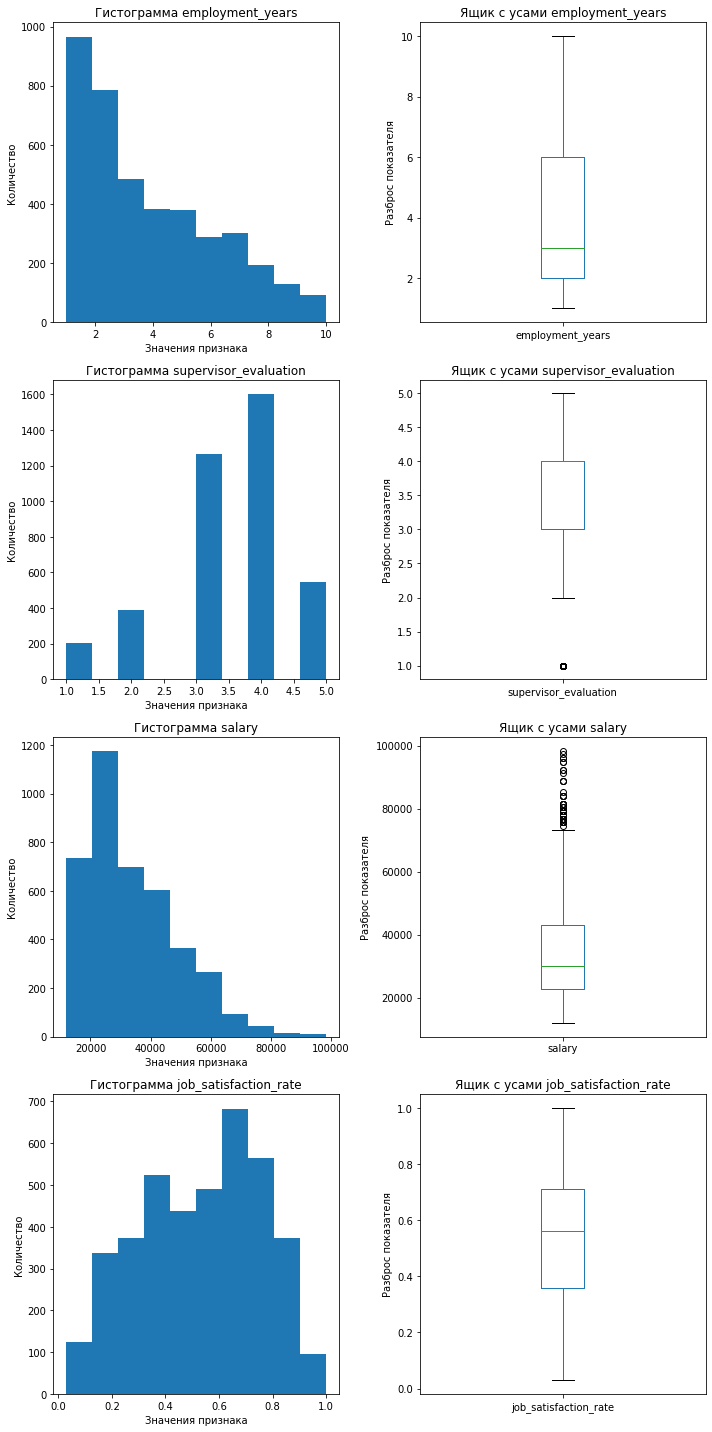

In [7]:
hist_and_box_numeric(trjsr.drop(['id'], axis=1))

Присутствуют не очень хорошие оценки работы сотрудника руководителем.

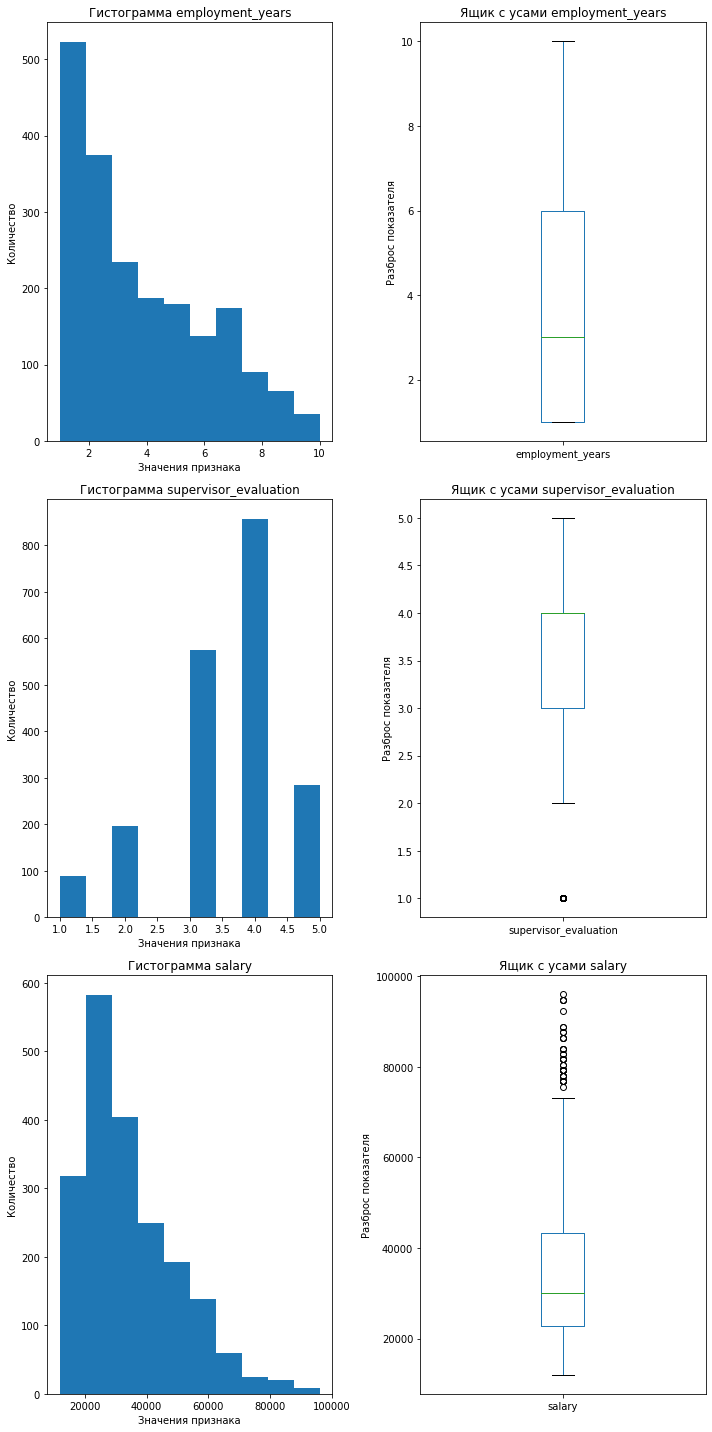

In [8]:
hist_and_box_numeric(tes_f.drop(['id'], axis=1))

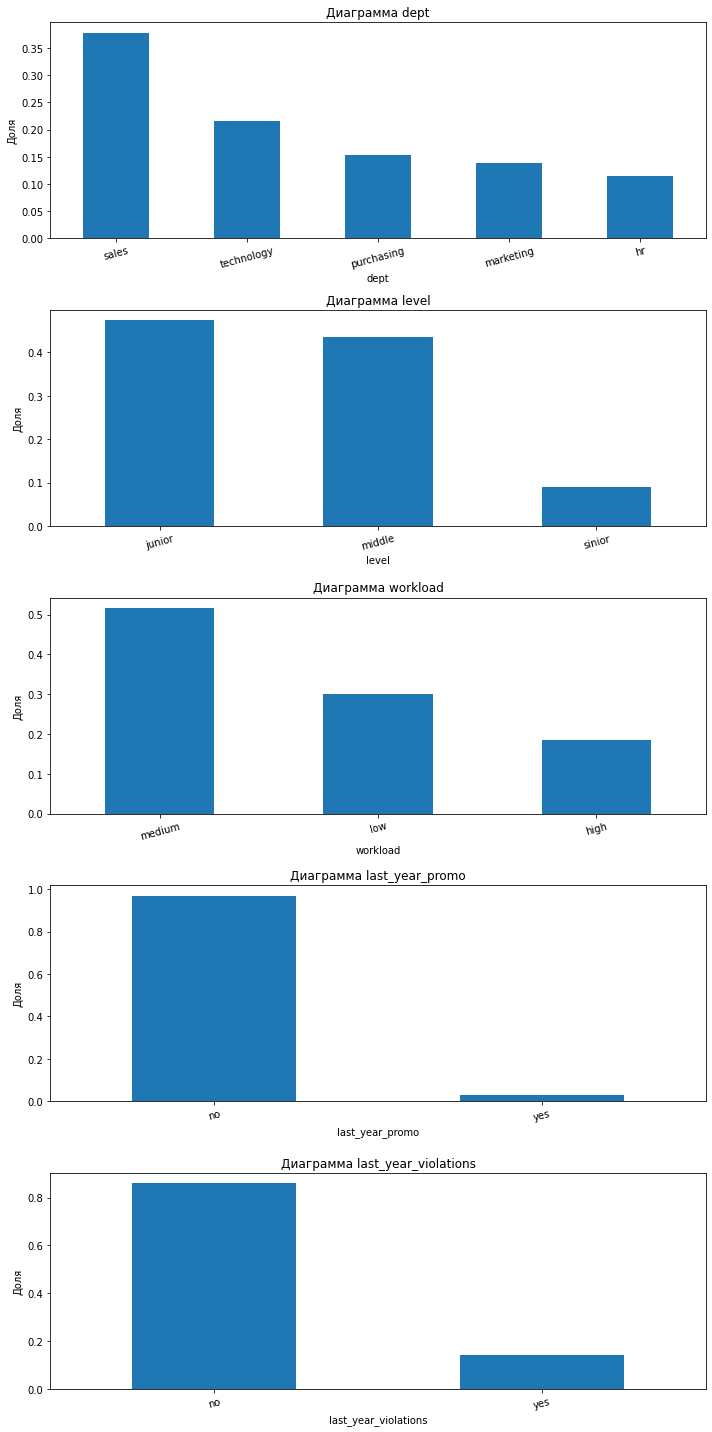

In [9]:
hist_and_box_obj(trjsr.drop(['id'], axis=1))

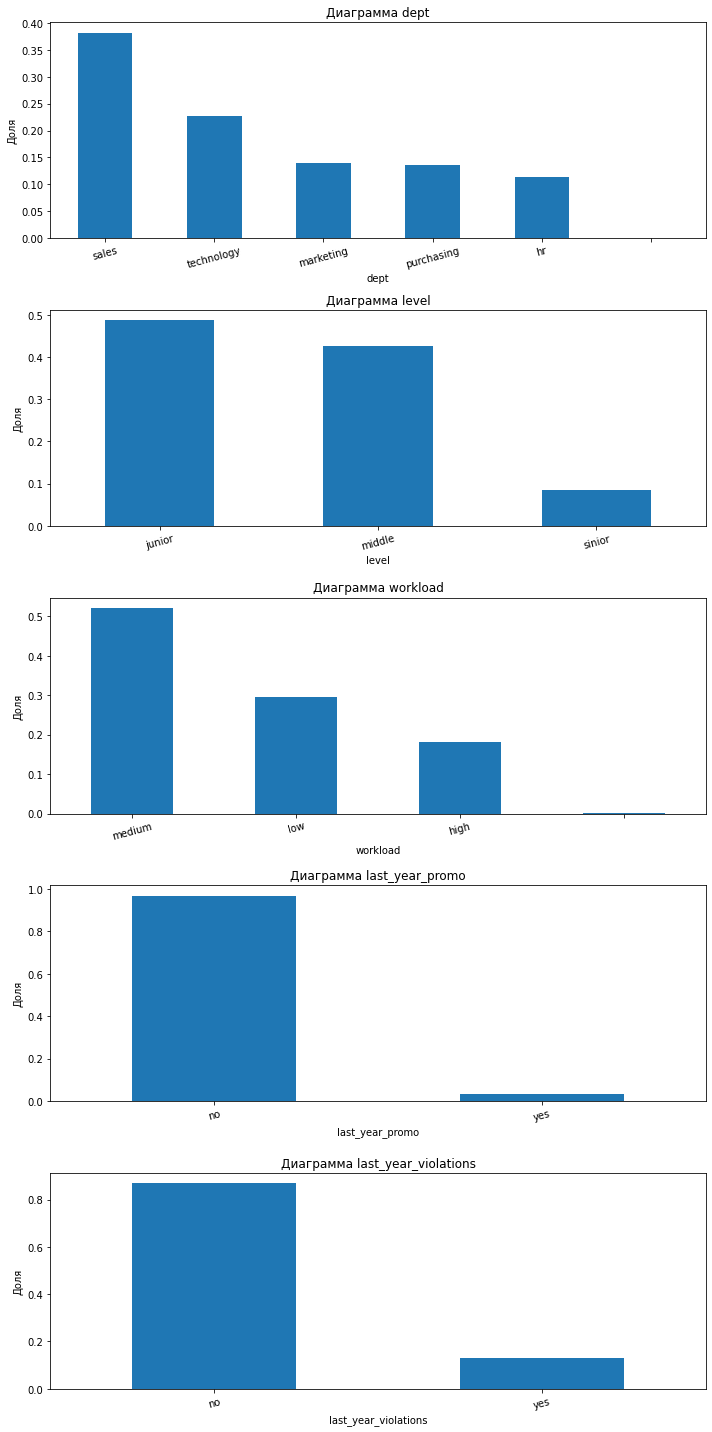

In [10]:
hist_and_box_obj(tes_f.drop(['id'], axis=1))

Есть дисбаланс некоторых признаков. Меня также смущает `sinior`, но допустим, мне казалось, что `senior`.

<div class="alert alert-info">

<h2> Комментарий студента: <a class="tocSkip"> </h2>
Спасибо, действительно упустил этот момент. В этом проекте пробовал сначала составить план, а потом уже делать работу - для меня лично плохой варинт. Большой объем информации путает и я теряю внимательность, можно сказать "глаза разбегаются". Медленный последовательный подход со сверкой проделанного, показал лучшую эффективность. При плане я невольно упускаю этап перепроверки. Но у каждого свой подход, просто этот не оправдал себя в моем случае.   
    
**Вывод:** в обучающем фрейме порядка 4000 строк, 9 столбцов. В некоторых данных есть пропуски. В признаках, подразумевающих ответы типа "да"/"нет" неравномерное распределение ответов - одной категории значительно больше другой. В признаках `workload`, `dept` есть небольшое количество данных без наименования категории, что будет необходимо исправить. Каких-то выбросов или аномалий на первый взгляд в данных не видно, распределение каждого признака в целом равномерно. В данных пордяка 1-го признака типа float64(является целевым и присутствует в обучающей выборке и тестовом таргете), 4-ых признаков типа int64, и 5-ть признаков типа object. Признак нагрузки делится на три категории: низкая, нормальная и высокая. Уровень занимаемой должности на три типа: джун, мидл и сеньор. Отдел, в котором работает сотрудник на 5-ть напарвлений: продаж, технологический, маркетинга, закупок и подбора персонала.**

<a id="11"></a>
### [Предобработка данных](#4.1)

In [11]:
def short_describe(data):
    """Сокращенная версия метдоа describe для упроженного анализа признаков."""
    data = data.describe()
    display(data[data.index.isin(['std', '50%', 'min', 'max'])].T)

<a id="12"></a>
#### [Пропущенные значения](#4.1)

Понятно, что пропущенные значения есть. По аданию их нужно исправить с помощью пайплайна. Чтобы не разносить логику по проекту, этот момент осуществлю в разделе подготовки данных для обучения моделей.

In [12]:
trjsr.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [13]:
tes_f.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Эти пропуски мы обнаружили при рассмотрении самих датафреймов.

<a id="13"></a>
#### [Дубликаты](#4.1)

In [14]:
print('Количество явных дубликатов train_job_satisfaction_rate:', trjsr.duplicated().sum())
print('Количество явных дубликатов test_features:', tes_f.duplicated().sum())
print('Количество явных дубликатов test_target_job_satisfaction_rate:', tes_tar_f.duplicated().sum())

Количество явных дубликатов train_job_satisfaction_rate: 0
Количество явных дубликатов test_features: 0
Количество явных дубликатов test_target_job_satisfaction_rate: 0


Явных дубликатов нет.

<a id="14"></a>
#### [Аномалии](#4.1)

In [15]:
short_describe(trjsr.drop(['id'], axis=1))

,std,min,50%,max
employment_years,2.542513,1.00,3.00,10.0
supervisor_evaluation,1.008812,1.00,4.00,5.0
salary,14900.703838,12000.00,30000.00,98400.0
job_satisfaction_rate,0.225327,0.03,0.56,1.0


In [16]:
short_describe(tes_f.drop(['id'], axis=1))

,std,min,50%,max
employment_years,2.537222,1.0,3.0,10.0
supervisor_evaluation,0.996892,1.0,4.0,5.0
salary,15398.436729,12000.0,30000.0,96000.0


Конечно может быть, но мне кажется очень сомнительным такие прям идельное совпадение данных для обучающей и тестовой выборки. Аномалий на первый взгляд нет, может смутить показатель `salary`, но зарплата у начинающих и оптыных коллег может различаться и ящик с усами нам это показывает. По распределению просто можем сделать вывод, что данных о начинающих во фрейме больше.

<a id="15"></a>
### [Исследовательский анализ данных](#4.1)

In [17]:
def research_numeric_data(data, value):
    """Выводим описание столбца числового типа, гистограмму с этим столбцом."""
    print('Описание данных:')
    display(data[value].describe().T)
    print()
    print('Уникальные значения(10 наиболее частых):')
    display(data[value].value_counts(ascending=False).head(10))
    print()
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

    data[value].plot(
        ax=axes[0], kind="hist", rot=0);
    axes[0].set_title(f"Гистограмма {value}")
    axes[0].set_ylabel('Количество')
    axes[0].set_xlabel(f'Значения признака {value}')
    data[value].plot(
        ax=axes[1], kind="box", xlabel=value, rot=0);
    axes[1].set_title(f'Ящик с усами {value}')
    fig.tight_layout()

    
def research_object_data(data, value):
    """Выводим описание столбца категориального типа, график с этим столбцом."""
    print('Уникальные значения:')
    display(data[value].value_counts(ascending=False))
    print()
    print(f'Линейчатый график для показателя: {value}')
    data[value].value_counts().plot(
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45);

def scatter_plot(data, x, y, objects):
    """Строит диаграммы рассеяния по переданным признакам в зависимости от списка категориальных."""
    row = 0
    column = 0
    fig, axes = plt.subplots(nrows=(len(objects) % 3), ncols=3, figsize=(20, 15))
    for obj in objects:
        sns.scatterplot(data=data, x=x, y=y, hue=obj, palette="husl", ax=axes[row, column])
        column += 1
        if column == 3:
            column = 0
            row += 1
    plt.show()

def research_numeric_data_with_target(data, value, target):
    """
    Распределение числового признака в зависимости от целевого.
    Наложенные диаграммы и два боксплота.
    """
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
    
    unique_target = data[target].unique()
    
    data[data[target] == unique_target[0]][value].plot(
        ax=axes[0], kind="hist", rot=0, color="r", label=unique_target[0], alpha=0.5)
    data[data[target] == unique_target[1]][value].plot(
        ax=axes[0], kind="hist", rot=0, color="g", label=unique_target[1], alpha=0.5)
    axes[0].set_title('Гистограммы с целевым признаком')
    axes[0].set_ylabel('Количество')
    axes[0].legend()
    axes[0].set_xlabel(f'Значения признака {value}')
    
    data[data[target] == unique_target[0]][value].plot(
        ax=axes[1], kind="box", xlabel=value, rot=0);
    axes[1].set_title(f'Боксплот с целевым признаком {unique_target[0]}')
    
    data[data[target] == unique_target[1]][value].plot(
        ax=axes[2], kind="box", xlabel=value, rot=0);
    axes[2].set_title(f'Боксплот с целевым признаком {unique_target[1]}')
    fig.tight_layout()

def research_object_data_with_target(data, value, target):
    """
    Распределение категориального признака в зависимости от целевого.
    Две диаграммы.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
    
    unique_target = data[target].unique()
    
    data[data[target] == unique_target[0]][value].value_counts().plot(
        ax=axes[0],
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45, color="r");
    axes[0].set_title(f'График для показателя: {value} c признаком {unique_target[0]}')

    data[data[target] == unique_target[1]][value].value_counts().plot(
        ax=axes[1],
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45, color="g");
    axes[1].set_title(f'График для показателя: {value} c признаком {unique_target[1]}')
    fig.tight_layout()

<a id="16"></a>
#### [Данные `train_job_satisfaction_rate.csv`](#4.1)

In [18]:
trjsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [19]:
analys_trjsr = trjsr.copy()
analys_trjsr['job_satisfaction_rate'] = trjsr['job_satisfaction_rate'].apply(lambda x: 'yes' if x >= 0.5 else 'no')

Уникальные значения:


sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64


Линейчатый график для показателя: dept


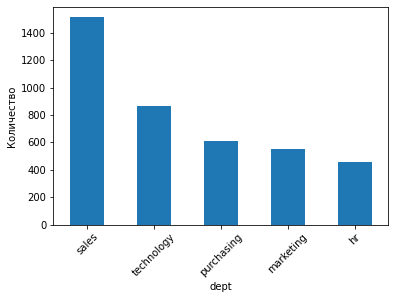

In [20]:
research_object_data(trjsr, 'dept')

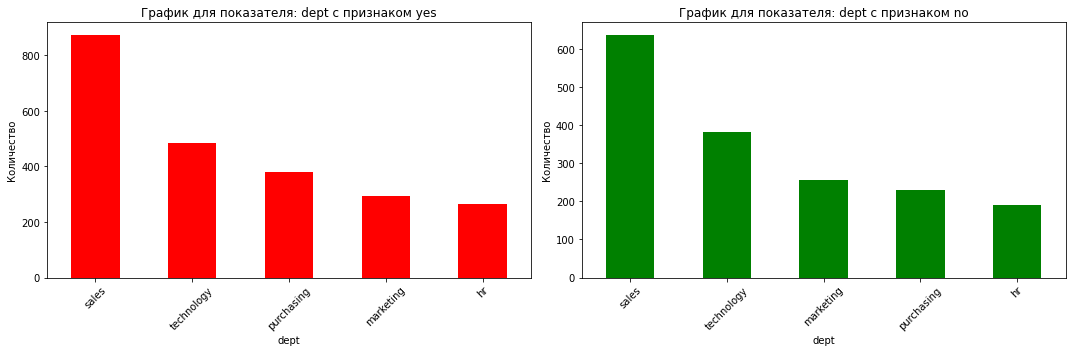

In [21]:
research_object_data_with_target(analys_trjsr, 'dept', 'job_satisfaction_rate')

Уникальные значения:


junior    1894
middle    1744
sinior     358
Name: level, dtype: int64


Линейчатый график для показателя: level


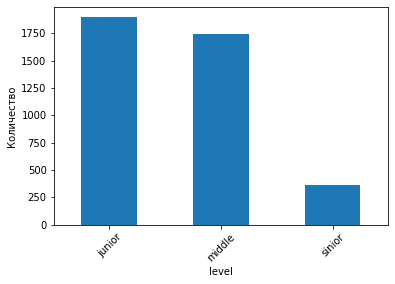

In [22]:
research_object_data(trjsr, 'level')

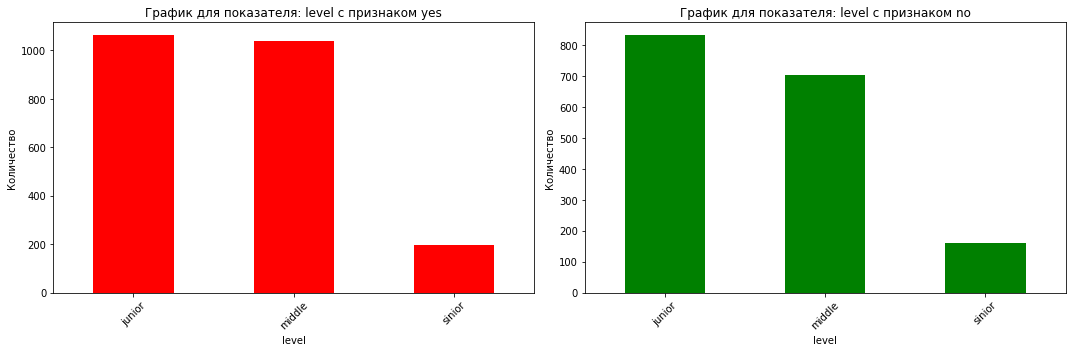

In [23]:
research_object_data_with_target(analys_trjsr, 'level', 'job_satisfaction_rate')

Уникальные значения:


medium    2066
low       1200
high       734
Name: workload, dtype: int64


Линейчатый график для показателя: workload


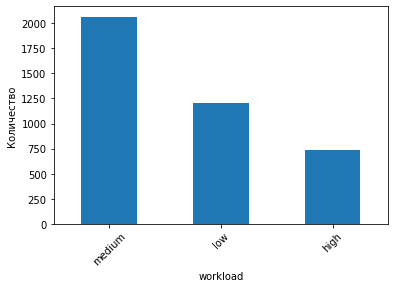

In [24]:
research_object_data(trjsr, 'workload')

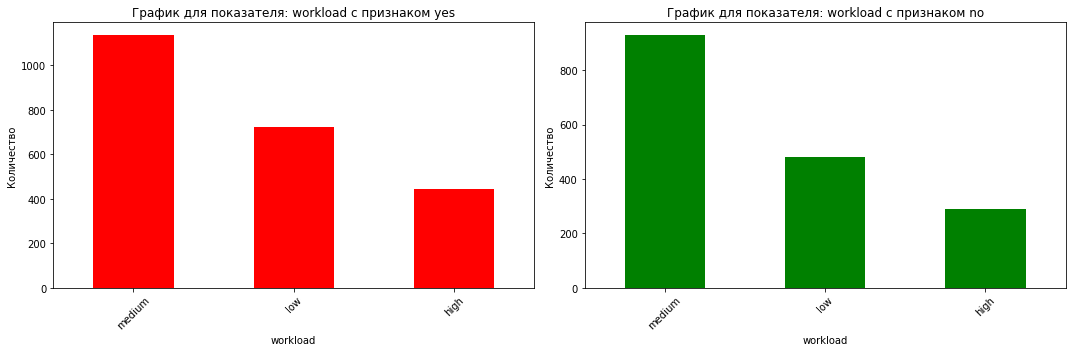

In [25]:
research_object_data_with_target(analys_trjsr, 'workload', 'job_satisfaction_rate')

Уникальные значения:


no     3880
yes     120
Name: last_year_promo, dtype: int64


Линейчатый график для показателя: last_year_promo


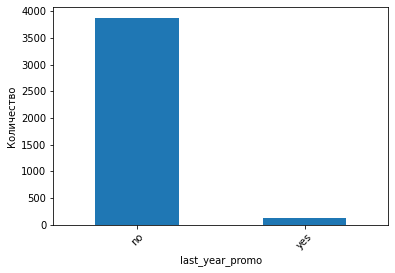

In [26]:
research_object_data(trjsr, 'last_year_promo')

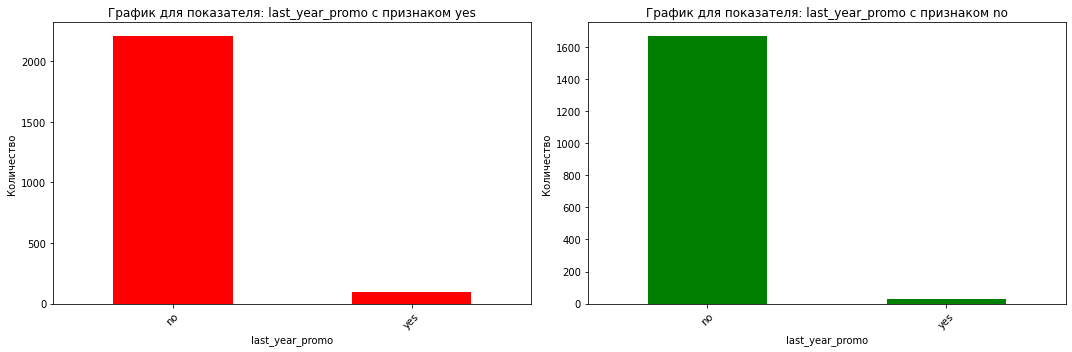

In [27]:
research_object_data_with_target(analys_trjsr, 'last_year_promo', 'job_satisfaction_rate')

Уникальные значения:


no     3441
yes     559
Name: last_year_violations, dtype: int64


Линейчатый график для показателя: last_year_violations


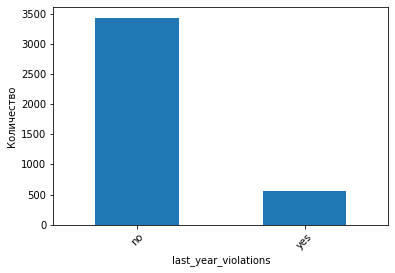

In [28]:
research_object_data(trjsr, 'last_year_violations')

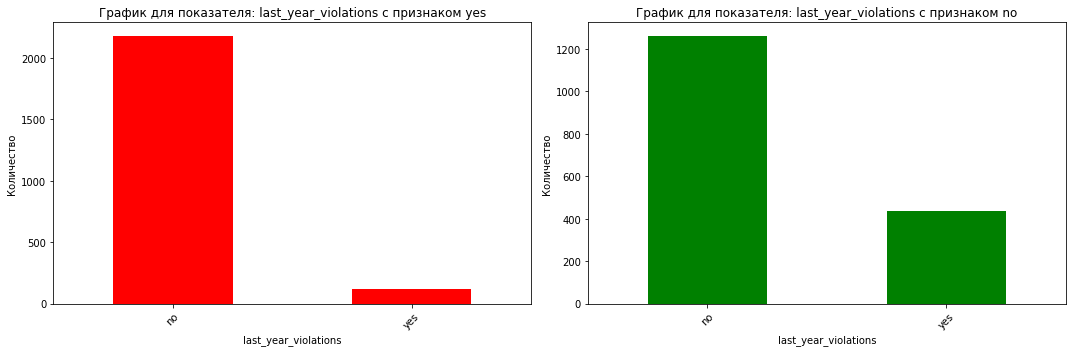

In [29]:
research_object_data_with_target(analys_trjsr, 'last_year_violations', 'job_satisfaction_rate')

Описание данных:


count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


Уникальные значения(10 наиболее частых):


1     966
2     785
3     483
4     384
5     380
7     301
6     287
8     193
9     130
10     91
Name: employment_years, dtype: int64

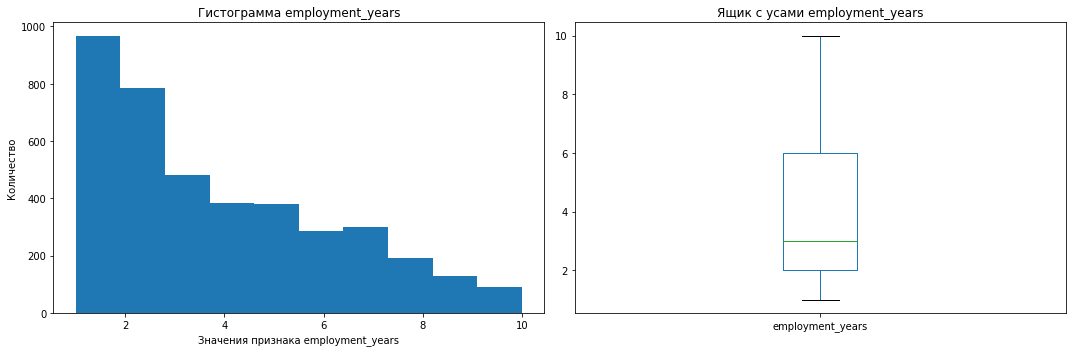

In [30]:
research_numeric_data(trjsr, 'employment_years')

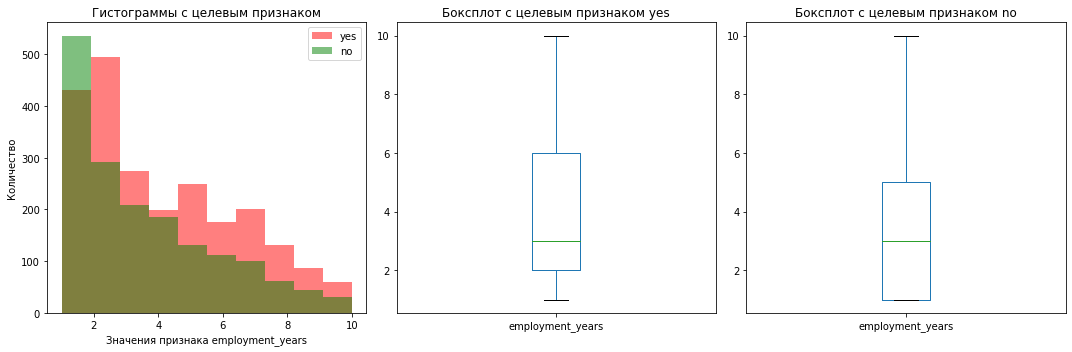

In [31]:
research_numeric_data_with_target(analys_trjsr, 'employment_years', 'job_satisfaction_rate')

Описание данных:


count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


Уникальные значения(10 наиболее частых):


4    1603
3    1263
5     546
2     387
1     201
Name: supervisor_evaluation, dtype: int64

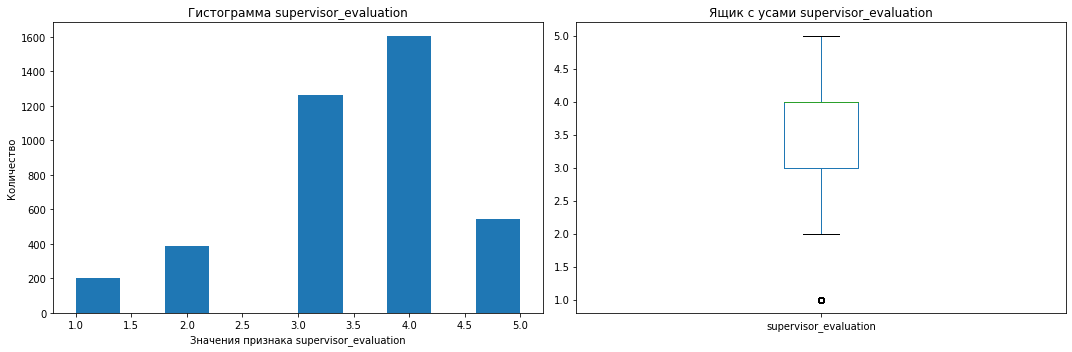

In [32]:
research_numeric_data(trjsr, 'supervisor_evaluation')

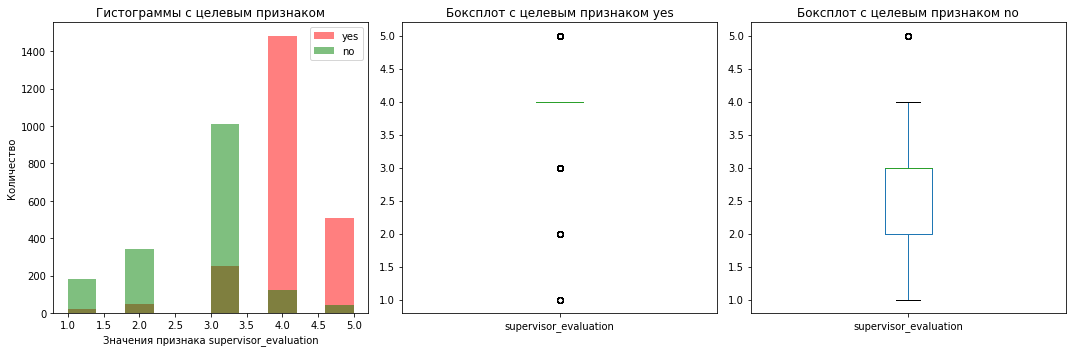

In [33]:
research_numeric_data_with_target(analys_trjsr, 'supervisor_evaluation', 'job_satisfaction_rate')

Описание данных:


count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


Уникальные значения(10 наиболее частых):


24000    187
27600    184
26400    167
21600    167
28800    164
19200    155
25200    153
33600    153
22800    152
31200    138
Name: salary, dtype: int64

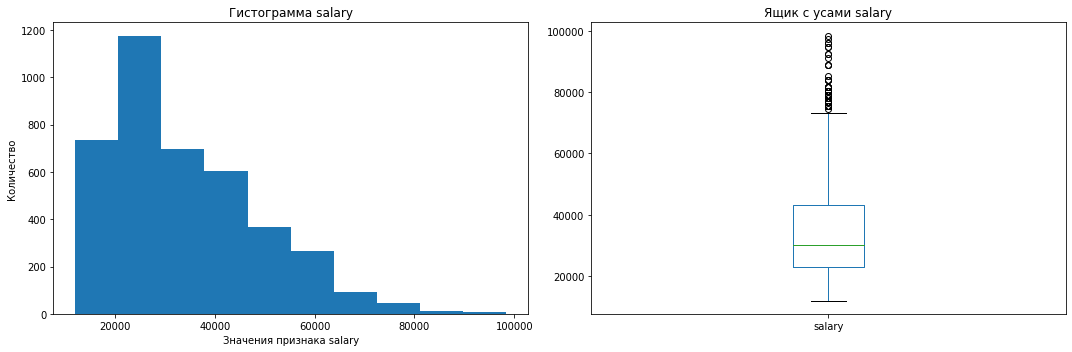

In [34]:
research_numeric_data(trjsr, 'salary')

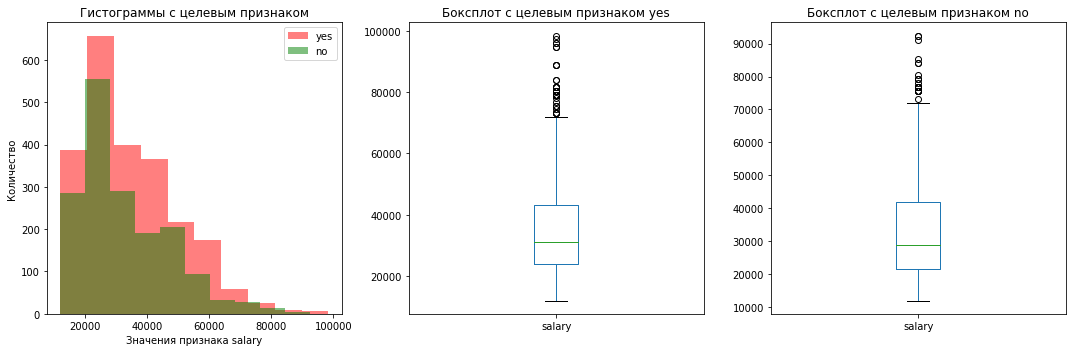

In [35]:
research_numeric_data_with_target(analys_trjsr, 'salary', 'job_satisfaction_rate')

Описание данных:


count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


Уникальные значения(10 наиболее частых):


0.65    94
0.67    90
0.68    85
0.69    84
0.66    81
0.77    78
0.70    75
0.36    72
0.63    70
0.60    66
Name: job_satisfaction_rate, dtype: int64

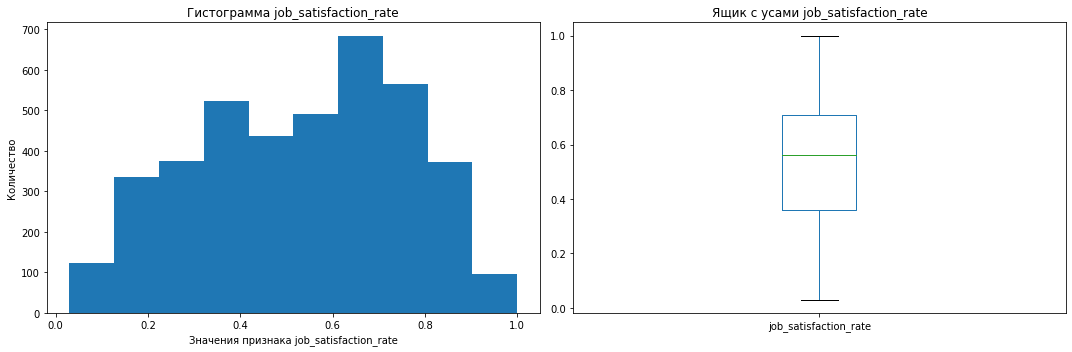

In [36]:
research_numeric_data(trjsr, 'job_satisfaction_rate')

В целом все данные смотрятся нормально, выбросов или каких-то ошибок нет. Был создан отдельный датафрейм с переводом целевого в категориальный, чтобы лучше визуализировать взаимодействие между признаками, что уже позволяет делать некоторые выводы, что у ушедших сотрудников была ниже зарплата, они получали более низкие оценки от руквоводителя меньше работали в компании и реже получали повышение.

<a id="17"></a>
#### [Данные `test_features.csv`](#4.1)

In [37]:
tes_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Уникальные значения:


sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64


Линейчатый график для показателя: dept


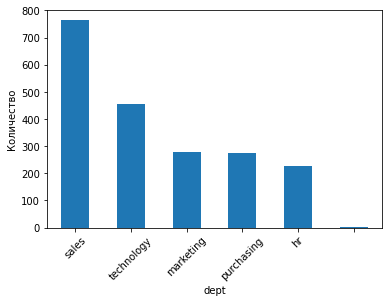

In [38]:
research_object_data(tes_f, 'dept')

In [39]:
tes_f[tes_f['dept'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


Есть значение вида пробела, заменим его на `None`, которое далее уже обработаем в пайплайне.

In [40]:
tes_f.loc[tes_f['dept'] == ' '] = np.nan

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>
    
Аномалия обработана корректно. В целом она могла бы быть обработана и в `Pipeline`, при настройке энкодеров на обработку новых значений признаков, которые не были на момент обучения энкодера.

Уникальные значения:


junior    974
middle    853
sinior    171
Name: level, dtype: int64


Линейчатый график для показателя: level


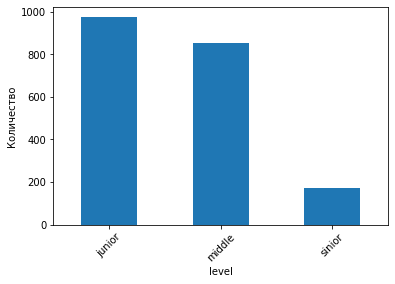

In [41]:
research_object_data(tes_f, 'level')

Уникальные значения:


medium    1042
low        593
high       363
             1
Name: workload, dtype: int64


Линейчатый график для показателя: workload


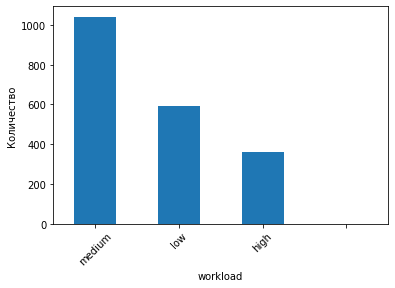

In [42]:
research_object_data(tes_f, 'workload')

И здесь тоже пробел, который заменим аналогично предыдущему признаку.

In [43]:
tes_f[tes_f['workload'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867.0,marketing,junior,,4.0,no,no,4.0,28800.0


In [44]:
tes_f.loc[tes_f['workload'] == ' '] = np.nan

Уникальные значения:


no     1935
yes      63
Name: last_year_promo, dtype: int64


Линейчатый график для показателя: last_year_promo


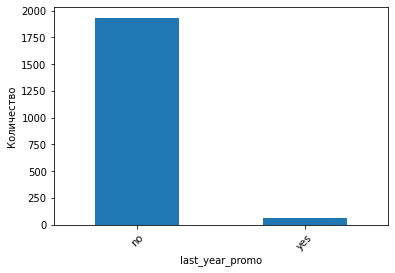

In [45]:
research_object_data(tes_f, 'last_year_promo')

Уникальные значения:


no     1736
yes     262
Name: last_year_violations, dtype: int64


Линейчатый график для показателя: last_year_violations


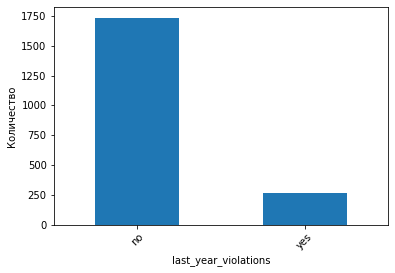

In [46]:
research_object_data(tes_f, 'last_year_violations')

Описание данных:


count    1998.000000
mean        3.666667
std         2.538438
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


Уникальные значения(10 наиболее частых):


1.0     522
2.0     374
3.0     233
4.0     186
5.0     179
7.0     174
6.0     138
8.0      91
9.0      66
10.0     35
Name: employment_years, dtype: int64

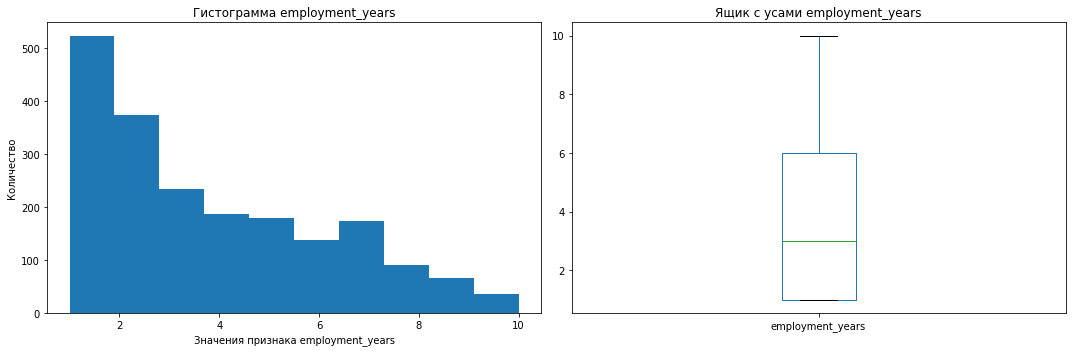

In [47]:
research_numeric_data(tes_f, 'employment_years')

Описание данных:


count    1998.000000
mean        3.526026
std         0.997279
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


Уникальные значения(10 наиболее частых):


4.0    855
3.0    575
5.0    284
2.0    196
1.0     88
Name: supervisor_evaluation, dtype: int64

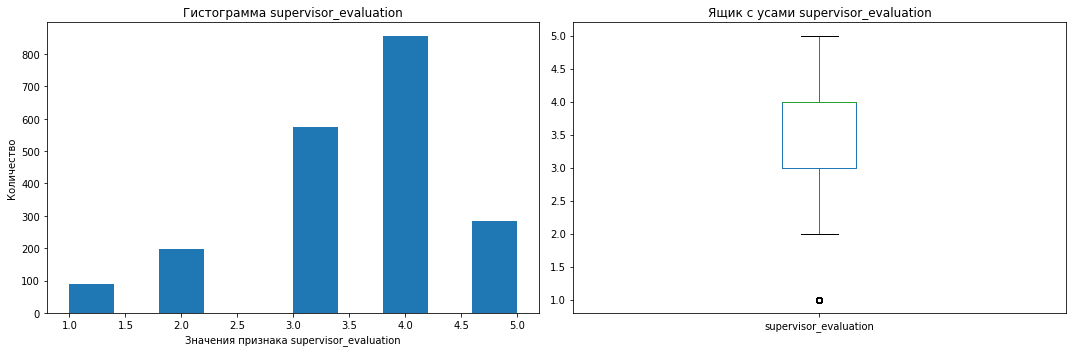

In [48]:
research_numeric_data(tes_f, 'supervisor_evaluation')

Описание данных:


count     1998.000000
mean     34067.267267
std      15405.389599
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


Уникальные значения(10 наиболее частых):


27600.0    109
26400.0     95
24000.0     93
19200.0     83
21600.0     83
33600.0     76
25200.0     73
22800.0     72
28800.0     70
31200.0     70
Name: salary, dtype: int64

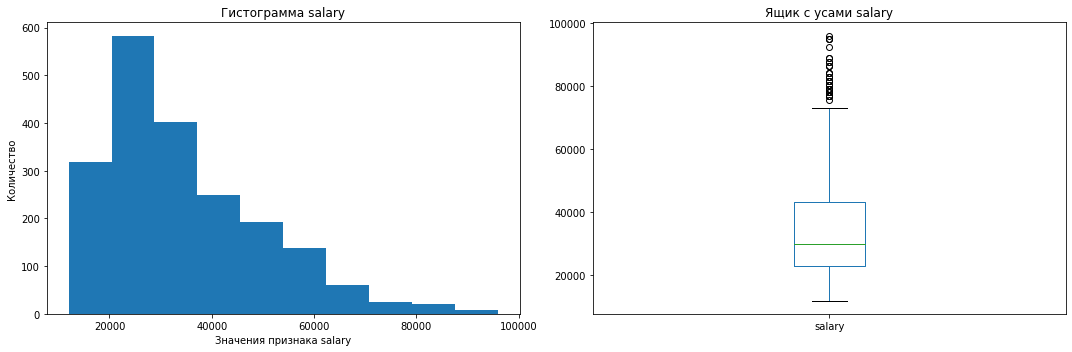

In [49]:
research_numeric_data(tes_f, 'salary')

Помимо пробельных значений больше аномалий не наблюдается.

<a id="18"></a>
#### [Данные `test_target_job_satisfaction_rate.csv`](#4.1)

Описание данных:


count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


Уникальные значения(10 наиболее частых):


0.70    49
0.67    48
0.65    47
0.75    47
0.68    47
0.69    44
0.66    42
0.64    42
0.76    39
0.71    37
Name: job_satisfaction_rate, dtype: int64

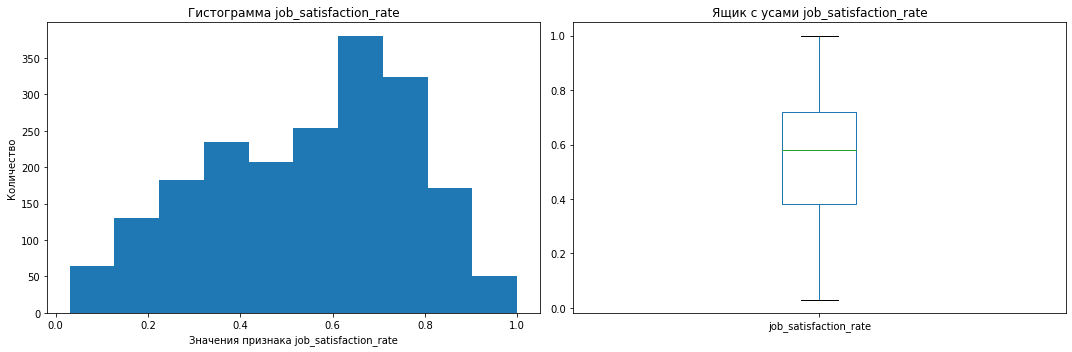

In [50]:
research_numeric_data(tes_tar_f, 'job_satisfaction_rate')

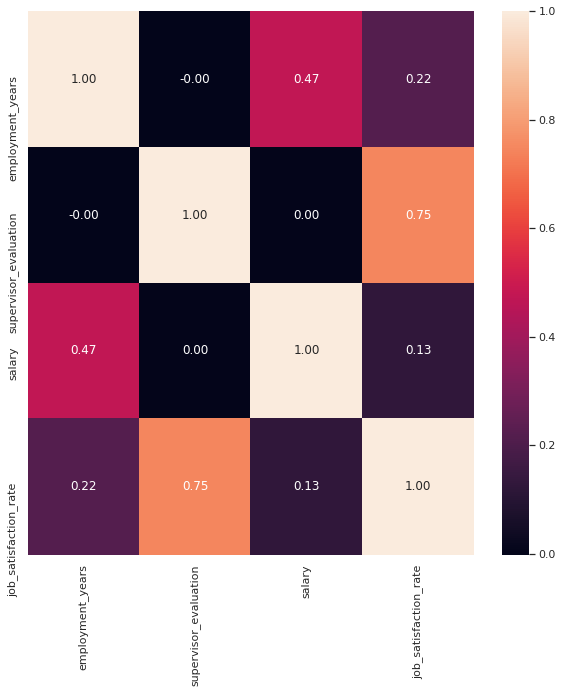

In [51]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(trjsr.drop(['id'], axis=1).corr(method='spearman'), annot=True, fmt='.2f');

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что проверяешь попарные корреляции признаков
<div class="alert alert-warning">
    
       
        
<b>Некоторые замечания и рекомендации💡:</b>     
    
Можно еще вывести phik корреляцию. Советую в методе phik_matrix указать параметр interval_cols, чтобы phik не определял сам численные признаки    

<div class="alert alert-info">

<h2> Комментарий студента: <a class="tocSkip"> </h2>
    
Принято, реализовано.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [159]:
trjsr.drop(['id'], axis=1).phik_matrix(
    interval_cols=trjsr.drop(
    ['id'],
    axis=1
).select_dtypes(exclude=['object']).columns.to_list())

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016509,0.037853,0.000000,0.000000,0.105495,0.282265,0.082086
level,0.000000,1.000000,0.419114,0.682773,0.101613,0.000000,0.000000,0.717630,0.080620
workload,0.016509,0.419114,1.000000,0.181941,0.058663,0.000000,0.037023,0.788820,0.056128
employment_years,0.037853,0.682773,0.181941,1.000000,0.183579,0.056808,0.000000,0.483419,0.325603
last_year_promo,0.000000,0.101613,0.058663,0.183579,1.000000,0.000000,0.013681,0.215025,0.190803
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.010078,0.560348
supervisor_evaluation,0.105495,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.000000,0.764364
salary,0.282265,0.717630,0.788820,0.483419,0.215025,0.010078,0.000000,1.000000,0.165830
job_satisfaction_rate,0.082086,0.080620,0.056128,0.325603,0.190803,0.560348,0.764364,0.165830,1.000000


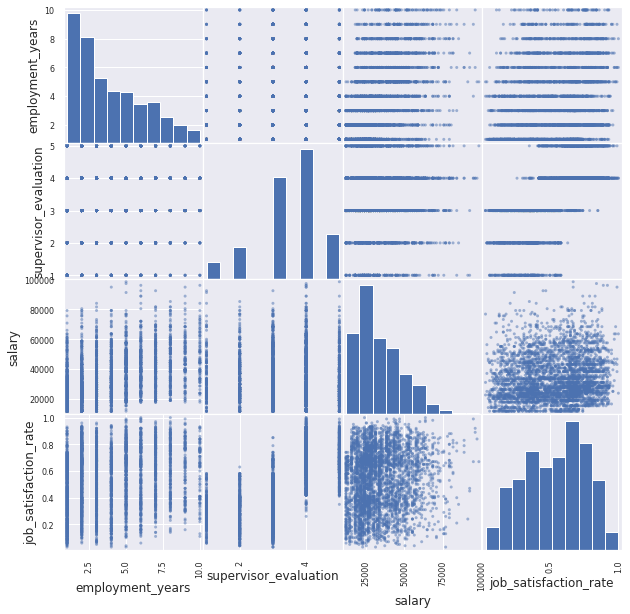

In [52]:
pd.plotting.scatter_matrix(trjsr.drop(['id'], axis=1), figsize=(10, 10));

С исследованием данных закончили, в целом распеределение всех признаков адекватно, пробельные моменты поправили. Далее переходим к подготовке данных, созданию пайплайнов. Слишком коррелирующих признаков нет, поэтому проблем с мультиколлинеарностью быть не должно. Так же для предсказаний целевого признака нас интересует удовлетворен работник своей работой или нет, поэтому количественный признак нужно будет перевести в категориальный, так называемое таргетэнкодинг.

<a id="19"></a>
### [Подготовка данных](#4.1)

In [53]:
def adding_signs(data_frame):
    """Функция для добавление дополнительных признаков."""
    data_frame['salary_2'] = data_frame['salary'] ** 2
    data_frame['salary_3'] = data_frame['salary'] ** 3

    data_frame['employment_years_2'] = data_frame['employment_years'] ** 2
    data_frame['employment_years_365'] = data_frame['employment_years'] * 365

    data_frame['supervisor_evaluation_2'] = data_frame['supervisor_evaluation'] ** 2
    data_frame['supervisor_evaluation_0_5'] = data_frame['supervisor_evaluation'] ** 0.5

    data_frame['employment_years_category'] = data_frame.apply(lambda x: 'более 3' if x.employment_years >= 3 else 'менее 3', axis=1)


Для начала переведем целевой признак в что-то более предсказуемое удовлетворен или нет. Возьмем границу в 0.5 за основу, если менее, то сотрудник скорее не удовлетворен, если более то скорее удовлетворен.

In [54]:
RANDOM_STATE = 4241

In [55]:
#trjsr['job_satisfaction_rate'] = trjsr['job_satisfaction_rate'].apply(lambda x: 1 if x > 0.5 else 0)

In [56]:
#label_encoder = LabelEncoder()

X_train_ch1 = trjsr.drop(['job_satisfaction_rate', 'id'], axis=1)
y_train_ch1 = trjsr['job_satisfaction_rate']

#y_train_ch1 = label_encoder.fit_transform(y_train_ch1)

Немного future enj.

In [57]:
adding_signs(X_train_ch1)

Cоздаём списки с названиями признаков.

ohe_columns = ['dept']
ord_columns = ['level', 'workload', 'last_year_promo', 'last_year_violations', 'employment_years_category']
num_columns = trjsr.drop(
    ['job_satisfaction_rate', 'id'],
    axis=1
).select_dtypes(exclude=['object']).columns.to_list()

In [58]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations',]
ord_columns = ['level', 'workload', 'employment_years_category']
num_columns = trjsr.drop(
    ['job_satisfaction_rate', 'id'],
    axis=1
).select_dtypes(exclude=['object']).columns.to_list()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>

<b>На доработку🤔:</b>


'last_year_promo' и 'last_year_violations' - непорядковые признаки, их нужно перенести в ohe_col. При порядковом кодировании мы ранжируем значения категоиального признака: 1,2,3... Это логично для тех признаков, в которых есть естественный порядок, например, размеры одежды S, M, L, XL. А если этого порядка нет, линейные модели будут обучаться не совсем корректно

<div class="alert alert-info">

<h2> Комментарий студента: <a class="tocSkip"> </h2>
    
О, спасибо большое. Честно говоря я не понял из курса, почему одни признаки мы заносим в ohe, а другие в ord, теперь ясно и логично.

Теперь строим пайплайны для наших кодировщиков.

In [59]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))  # , sparse=False
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[ 
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'low', 'high'],
                    ['yes', 'no'],
                    ['yes', 'no'],
                    ['более 3', 'менее 3'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [60]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[ 
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'low', 'high'],
                    ['более 3', 'менее 3'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Cоздаём общий пайплайн для подготовки данных.

In [61]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Создаём итоговый пайплайн: подготовка данных и модель.

In [62]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

Далее создаем пайплайн для требуемых моделей.

In [63]:
param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        #'models__min_samples_split': range(2, 15),
        #'models__max_leaf_nodes': range(2, 15),
        'models__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
]

<a id="20"></a>
### [Обучение моделей](#4.1)

<a id="21"></a>
#### [Метрика SMAPE](#4.1)

Выбор делайте на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»).

In [64]:
def SMAPE(y_true, y_predict):
    """Cимметричное среднее абсолютное процентное отклонение."""
    return 100/len(y_true) * np.sum(2 * np.abs(y_true - y_predict) / (np.abs(y_true) + np.abs(y_predict)))

mean_absolute_percentage_error = make_scorer(SMAPE, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Верно, что задаешь параметр `greater_is_better=False`. Дело в том, что разработчики пакета `sklearn` при создании функций `cross_val_score` и `GridSearchCV` утвердили соглашение: возвращаемые результаты вычислений данных функций должны соответствовать задаче максимизации (чем большее значение метрики получаем, тем лучше). При этом обратная задача минимизации может быть осуществлена через максимизацию метрики, домноженной на -1. Об этом можно чуть подробнее почитать в документации пакета, правда она на английском. Оставлю <a href = 'https://scikit-learn.org/stable/modules/model_evaluation.html'>ссылку</a>. 

<a id="22"></a>
#### [Модели](#4.1)

from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=RANDOM_STATE)
X_resample, y_resample = sampler.fit_resample(X_train_ch1, y_train_ch1)

from imblearn.over_sampling import SMOTENC

index = X_train_ch1.columns.get_indexer(X_train_ch1.select_dtypes(include=['object']).columns)

sampler = SMOTENC(categorical_features=index, random_state=RANDOM_STATE, k_neighbors=1)
X_train_resample, y_train_resample = sampler.fit_resample(X_train_ch1, y_train_ch1)

In [65]:
%%time
#from sklearn.model_selection import GridSearchCV
# RandomizedSearchCV

rs = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    scoring=mean_absolute_percentage_error, 
    cv=5,
    n_jobs=-1
)
rs.fit(X_train_ch1, y_train_ch1)
print('Лучшая модель и её параметры:\n\n', rs.best_estimator_)
print('Метрика mean_absolute_percentage_error для лучшей модели:\n', rs.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
                                 

In [66]:
# Преподаватель дал коллеге совет кодировать целевой признак так, помогло, характеристика стала 55.2, а не 94.
#y_test_ch1 = tes_tar_f['job_satisfaction_rate'].apply(lambda x: 1 if x > 0.5 else 0).values

test_data_ch1 = pd.merge(
    tes_tar_f,
    tes_f,
    how='left',
    on='id'
)
adding_signs(test_data_ch1)

#y_test_ch1 = label_encoder.transform(test_data_ch1['job_satisfaction_rate'])
y_test_ch1 = test_data_ch1['job_satisfaction_rate']
y_test_pred = rs.predict(test_data_ch1.drop(['job_satisfaction_rate' ,'id'], axis=1))
print(SMAPE(y_test_ch1, y_test_pred))

14.891589656280622


<a id="23"></a>
### [Общий вывод задачи](#4.1)

**Вместо того, чтобы каждую модель разбирать отдельно, как хочет проект - я напишу как докатился до этого.**
Я не понимаю, почему на выходе nan. Попробовал поиграться с типами данных, иначе получается 94, но это не проходит по метрике заказчика. Скорее всего как и в прошлых работаех есть какой-то "подводный камень" о котором мне неизвестно.

Подводный камень обнаружен, я вручную кодировал целевой признак через 0/1, а нужно было использовать LabelEncoder. Качество выросло до 55 и исчезли nan. Но метрика всё равно недостаточно хорошая. Добавил пару параметров для модели и достигли 49. Окей, но всё еще мало. Скорее всего вес признаков, да? Нужно провести балансировку? Попробовал - ничего лучше не стало, даже хуже.

Еееей, еще победили один из тупников. С одной стороны курс по DS реально запарен, но тут я понял, что вообще-то у нас два датафрейма `test_features` и `test_target_job...`. Знаешь, что я делал по глупости? Игнорил `id` и вместо мерджа просто закидывал нужные мне столбцы. Поэтому модель давала какие-то кривые предсказания, ведь запись с одним `id` из тестовой выборки не соотносилась с `id` из предсказаний. Объединил два датафрейма и оп, уже 24.5. Остается какой-то один маленький момент, о котором я пока не знаю. По предыдущим ревью могу только предположить, что нужно копаться в признаках и какие-то переводить в категориальные.

Ну и это тоже проделали, но не сильно помогло - дошли примерно до 21.96. Край же 15. Убираем LabelEncoder и уже 20.

Ей, задача выполнена, модель с параметрами DecisionTreeRegressor(max_depth=14, random_state=4241) даёт метрику в 14.74589098000366. Задача выполнена, много свойств модели не всегда хорошо.

Лучше всего справилась модель дерева, что неудивительно, исходя из её функционала работы. Дерево с глубиной в 14 элементов позволила получить желаемую заказчиком метрику. Лучший скалер MinMaxScaler. Данная модель достаточно успешно позволяет нам предсказывать уровень удовлетворенности сотрудника.

<a id="24"></a>
## Задача №2: предсказание увольнения сотрудника из компании

<a id="25"></a>
### Исходные данные

Для этой задачи заказчик предоставил данные с признаками такими же, как и в предыдущей задаче:    
    
* `id` — уникальный идентификатор сотрудника;
* `dept` — отдел, в котором работает сотрудник;
* `level` — уровень занимаемой должности;
* `workload` — уровень загруженности сотрудника;
* `employment_years` — длительность работы в компании (в годах);
* `last_year_promo` — показывает, было ли повышение за последний год;
* `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
* `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
* `salary` — ежемесячная зарплата сотрудника;
* `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании.
* **`quit`** — увольнение сотрудника из компании, **целевой признак**.

Тренировочная выборка:    
`train_quit.csv` [скачать](https://code.s3.yandex.net/datasets/train_quit.csv)

Входные признаки тестовой выборки:    
`test_features.csv` [скачать](https://code.s3.yandex.net/datasets/test_features.csv)

Целевой признак тестовой выборки:    
`test_target_quit.csv` [скачать](https://code.s3.yandex.net/datasets/test_target_quit.csv)


<a id="25.1"></a>
#### Данную задачу разделим на несколько частей.

[Часть 1. Описание проекта](#1)    
[Часть 2. Цель проекта](#2)    
[Часть 3. Задача №1: предсказание уровня удовлетворённости сотрудника](#3)  
[Часть 4. Задача №2: предсказание увольнения сотрудника из компании](#24)  
&nbsp;&nbsp;&nbsp;4.1. [Исходные данные](#25)   
&nbsp;&nbsp;&nbsp;4.2. [Загрузка данных и изучение общей информации](#26)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.1 [Общие функции](#27)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.2 [Анализ файла `train_quit.csv`](#28)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.3 [Анализ файла `test_features.csv`](#29)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.4 [Анализ файла `test_target_quit.csv`](#30)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.5 [Гистограммы и ящики с усами](#31)   
&nbsp;&nbsp;&nbsp;4.3. [Предобработка данных](#32)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3.1 [Пропущенные значения](#33)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3.2 [Дубликаты](#34)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.3 [Аномалии](#35)   
&nbsp;&nbsp;&nbsp;4.4. [Исследовательский анализ данных](#36)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.1 [Данные `train_quit.csv`](#37)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.2 [Данные `test_features.csv`](#38)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.3 [Данные `test_target_quit.csv`](#39)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.4 [Портрет «уволившегося сотрудника»](#46)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.5 [Проверка утверждения аналитиков](#47)  
&nbsp;&nbsp;&nbsp;4.5. [Добавление нового входного признака](#40) 
&nbsp;&nbsp;&nbsp;4.6. [Подготовка данных](#41)  
&nbsp;&nbsp;&nbsp;4.7. [Обучение моделей](#42)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.7.1 [Метрика ROC_AUC](#43)    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.7.2 [Модели](#44)    
&nbsp;&nbsp;&nbsp;4.8. [Общий вывод задачи](#45)   
[Общие выводы](#48)  

<a id="26"></a>
### [Загрузка данных и изучение общей информации](#25.1)

<a id="27"></a>
#### [Общие функции](#25.1)

Пусть этот раздел и дублирует предыдущий, но удобнее если функции будут находиться так же и тут, на случай если в этом разделе мы захотим что-то изменить.

In [67]:
def view_and_get_data(path, sep=None, decimal=","):
    """
    Открывает файл, выводит первые 10 строк,
    основную информцию о дата фрейме и возвращает датафрейм.
    Принимает разделить в csv файле и разделитель десятичных чисел(по умолчанию запятая).
    """
    try:
        # Пробуем открыть файл локально, если нет, то через сервер яндекса.
        data = pd.read_csv(path, sep=sep, decimal=decimal, engine='python')
    except Exception:
        print('Локальный файл не найден. Пробую открыть серверную версию файла.')
        data = pd.read_csv(f'https://code.s3.yandex.net{path}', sep=sep, decimal=decimal)
        
    display(data.head(10))
    data.info()
    return data


def hist_and_box_numeric(data):
    """
    Принимает датафрейм для построения гистрограм и боксплотов для
    числовых столбцев.
    """
    columns = data.select_dtypes(exclude=['object']).columns.to_list()
    fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(10, 20))
    
    for number in range(len(columns)):
        data[columns[number]].plot(
            ax=axes[number, 0], kind="hist", ylabel=columns[number], rot=0);
        axes[number, 0].set_title(f'Гистограмма {columns[number]}')
        axes[number, 0].set_ylabel('Количество')
        axes[number, 0].set_xlabel('Значения признака')
        data[columns[number]].plot(
            ax=axes[number, 1], kind="box", ylabel='Разброс показателя', rot=0);
        axes[number, 1].set_title(f'Ящик с усами {columns[number]}')
    fig.tight_layout()

    
def hist_and_box_obj(data):
    """
    Принимает датафрейм для построения гистрограм и боксплотов для
    категориальных столбцев.
    """
    columns = data.select_dtypes(include=['object']).columns

    if len(columns) > 1:
        columns = columns.to_list()
        fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 20))
        for number in range(len(columns)):
            data[columns[number]].value_counts(normalize=True).plot(
                ax=axes[number], kind='bar', xlabel=columns[number], ylabel='Доля', rot=15);
            axes[number].set_title(f'Диаграмма {columns[number]}')
        fig.tight_layout()
    else:
        columns = columns.to_list()
        data[columns[0]].value_counts(normalize=True).plot(
            kind='bar', xlabel=columns[0], ylabel='Доля', rot=15, title=f'Диаграмма {columns[0]}');

<a id="28"></a>
#### [Анализ файла `train_quit.csv`](#25.1)

In [68]:
train_quit_data = view_and_get_data('/datasets/train_quit.csv')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


В файле 4000 строк, пропусков нет.

<a id="29"></a>
#### [Анализ файла `test_features.csv`](#25.1)

In [69]:
test_features_data = view_and_get_data('/datasets/test_features.csv')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Во фрейме 2000 строк, есть пропуски в дух столбцах `dept` и `level`.

<a id="30"></a>
#### [Анализ файла `test_target_quit.csv`](#25.1)

In [70]:
test_target_quit_data = view_and_get_data('/datasets/test_target_quit.csv')

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Во фрейме 2000 строк, пропусков нет.

<a id="31"></a>
#### [Гистограммы и ящики с усами](#25.1)

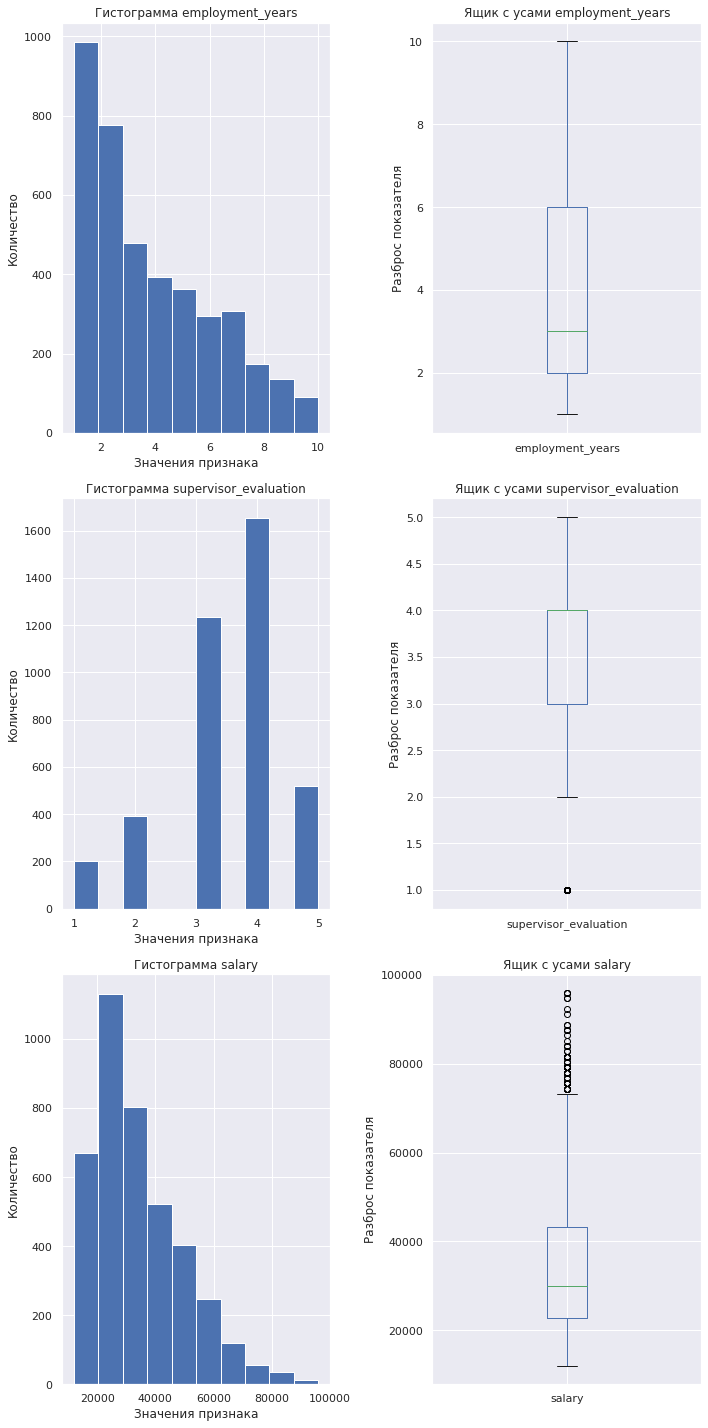

In [71]:
hist_and_box_numeric(train_quit_data.drop(['id'], axis=1))

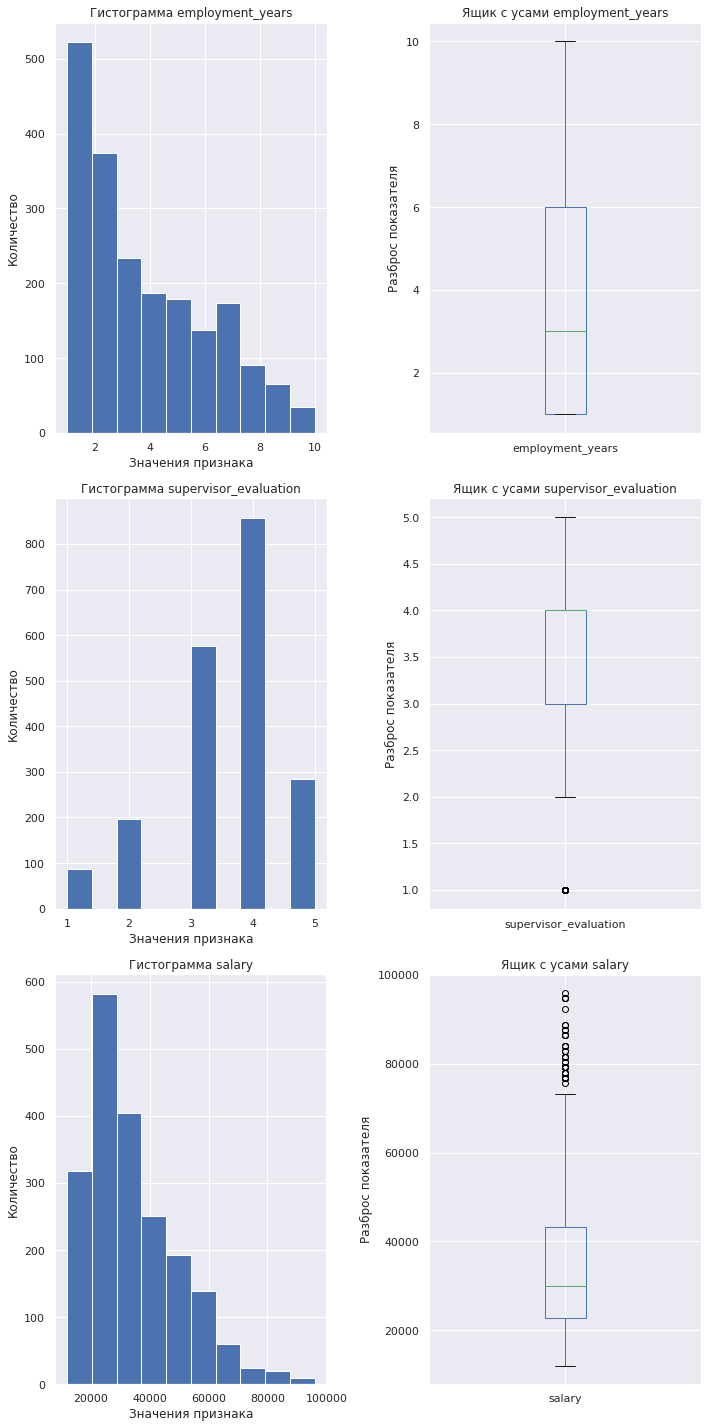

In [72]:
hist_and_box_numeric(test_features_data.drop(['id'], axis=1))

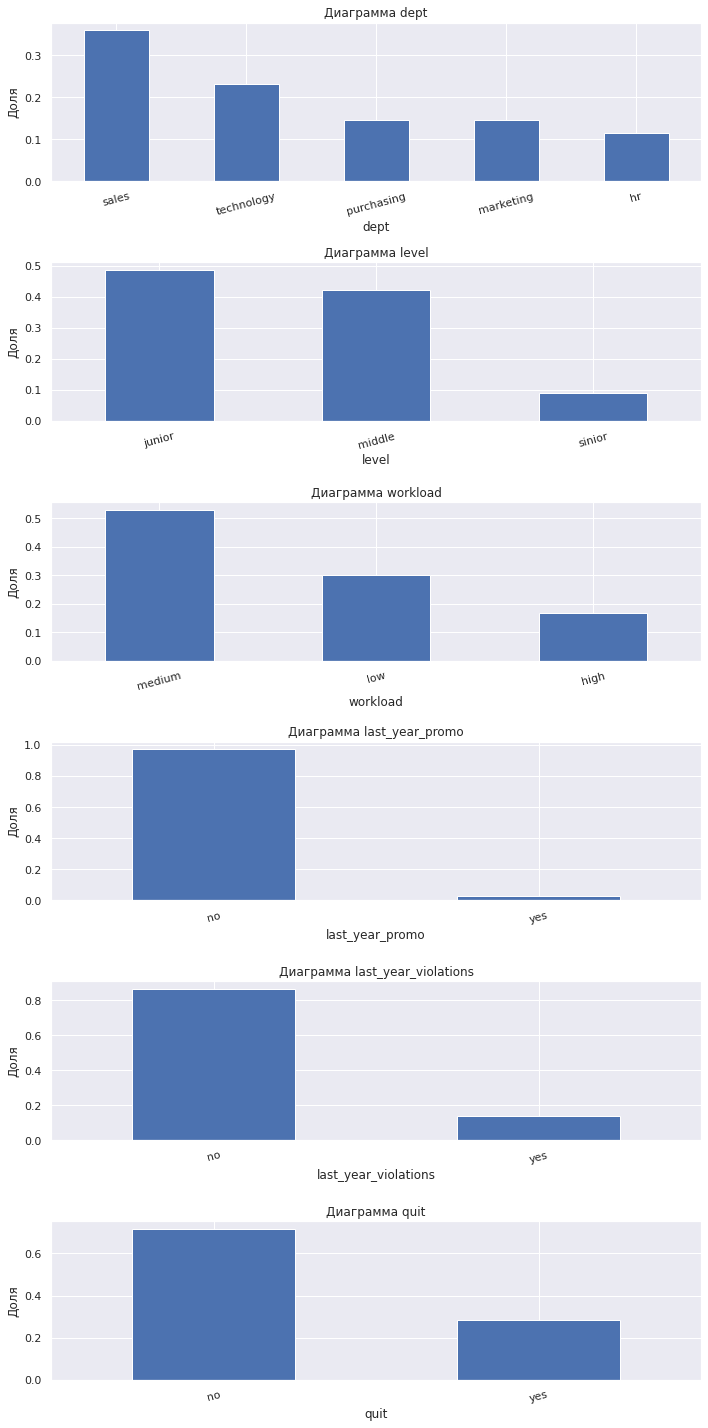

In [73]:
hist_and_box_obj(train_quit_data)

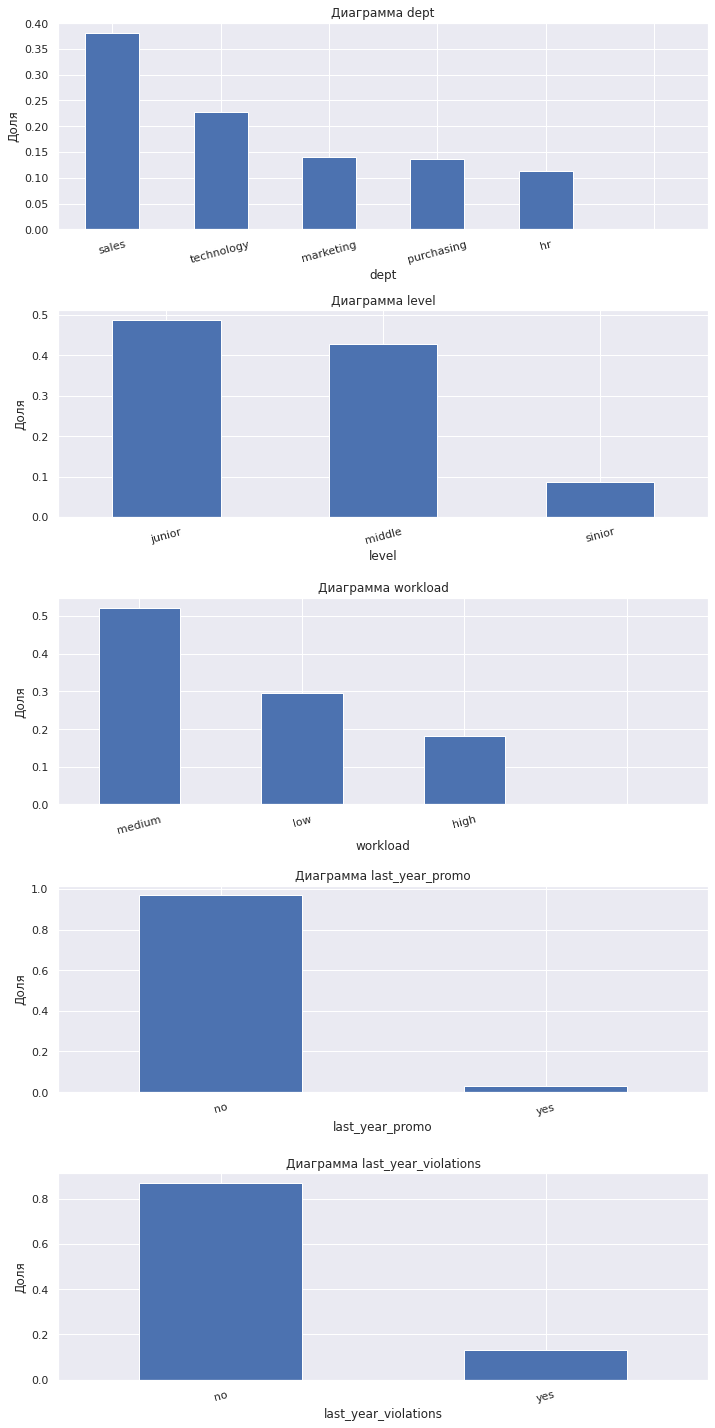

In [74]:
hist_and_box_obj(test_features_data)

В целом похоже так же на предыдущий раздел и снова в признаке `workload` присутсвует ' '. Поправим далее.

In [75]:
test_features_data.loc[test_features_data['dept'] == ' ', 'dept'] = np.nan
test_features_data.loc[test_features_data['workload'] == ' ', 'workload'] = np.nan
test_features_data.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

<div class="alert alert-info">

<h2> Комментарий студента: <a class="tocSkip"> </h2>

**Вывод:** в обучающем фрейме порядка 4000 строк, 9 столбцов, вместо признака удовлетворенности работой, теперь целевой признак уволилися или нет. В некоторых данных есть пропуски. В признаках, подразумевающих ответы типа "да"/"нет" неравномерное распределение ответов - одной категории значительно больше другой. В признаках `workload`, `dept` есть небольшое количество данных без наименования категории, что будет необходимо исправить. Каких-то выбросов или аномалий на первый взгляд в данных не видно, распределение каждого признака в целом равномерно. В данных пордяка 1-го признака типа object(является целевым и присутствует в обучающей выборке и тестовом таргете), 4-ых признаков типа int64, и 5-ть признаков типа object. Признак нагрузки делится на три категории: низкая, нормальная и высокая. Уровень занимаемой должности на три типа: джун, мидл и сеньор. Отдел, в котором работает сотрудник на 5-ть напарвлений: продаж, технологический, маркетинга, закупок и подбора персонала.*

<a id="32"></a>
### [Предобработка данных](#25.1)

In [76]:
def short_describe(data):
    """Сокращенная версия метдоа describe для упроженного анализа признаков."""
    data = data.describe()
    display(data[data.index.isin(['std', '50%', 'min', 'max'])].T)

<a id="33"></a>
#### [Пропущенные значения](#25.1)

In [77]:
train_quit_data.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [78]:
test_features_data.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [79]:
test_target_quit_data.isna().sum()

id      0
quit    0
dtype: int64

Пропуски есть только в тестовом фрейме с основными признаками.

<a id="34"></a>
#### [Дубликаты](#25.1)

In [80]:
print('Количество явных дубликатов train_job_satisfaction_rate:', train_quit_data.duplicated().sum())
print('Количество явных дубликатов test_features:', test_features_data.duplicated().sum())
print('Количество явных дубликатов test_target_job_satisfaction_rate:', test_target_quit_data.duplicated().sum())

Количество явных дубликатов train_job_satisfaction_rate: 0
Количество явных дубликатов test_features: 0
Количество явных дубликатов test_target_job_satisfaction_rate: 0


Явных дубликатов во фреймах нет.

<a id="35"></a>
#### [Аномалии](#25.1)

In [81]:
short_describe(train_quit_data.drop(['id'], axis=1))

,std,min,50%,max
employment_years,2.541852,1.0,3.0,10.0
supervisor_evaluation,1.004049,1.0,4.0,5.0
salary,15152.415163,12000.0,30000.0,96000.0


In [82]:
short_describe(test_features_data.drop(['id'], axis=1))

,std,min,50%,max
employment_years,2.537222,1.0,3.0,10.0
supervisor_evaluation,0.996892,1.0,4.0,5.0
salary,15398.436729,12000.0,30000.0,96000.0


Каких-то заметных отклонений нет, данные распределены вполне нормально.

<a id="36"></a>
### [Исследовательский анализ данных](#25.1)

In [83]:
def research_numeric_data(data, value):
    """Выводим описание столбца числового типа, гистограмму с этим столбцом."""
    print('Описание данных:')
    display(data[value].describe().T)
    print()
    print('Уникальные значения(10 наиболее частых):')
    display(data[value].value_counts(ascending=False).head(10))
    print()
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

    data[value].plot(
        ax=axes[0], kind="hist", rot=0);
    axes[0].set_title(f"Гистограмма {value}")
    axes[0].set_ylabel('Количество')
    axes[0].set_xlabel(f'Значения признака {value}')
    data[value].plot(
        ax=axes[1], kind="box", xlabel=value, rot=0);
    axes[1].set_title(f'Ящик с усами {value}')
    fig.tight_layout()

    
def research_object_data(data, value):
    """Выводим описание столбца категориального типа, график с этим столбцом."""
    print('Уникальные значения:')
    display(data[value].value_counts(ascending=False))
    print()
    print(f'Линейчатый график для показателя: {value}')
    data[value].value_counts().plot(
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45);

def scatter_plot(data, x, y, objects):
    """Строит диаграммы рассеяния по переданным признакам в зависимости от списка категориальных."""
    row = 0
    column = 0
    fig, axes = plt.subplots(nrows=(len(objects) % 3), ncols=3, figsize=(20, 15))
    for obj in objects:
        sns.scatterplot(data=data, x=x, y=y, hue=obj, palette="husl", ax=axes[row, column])
        column += 1
        if column == 3:
            column = 0
            row += 1
    plt.show()

def research_numeric_data_with_target(data, value, target):
    """
    Распределение числового признака в зависимости от целевого.
    Наложенные диаграммы и два боксплота.
    """
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
    
    unique_target = data[target].unique()
    
    data[data[target] == unique_target[0]][value].plot(
        ax=axes[0], kind="hist", rot=0, color="r", label=unique_target[0], alpha=0.5)
    data[data[target] == unique_target[1]][value].plot(
        ax=axes[0], kind="hist", rot=0, color="g", label=unique_target[1], alpha=0.5)
    axes[0].set_title('Гистограммы с целевым признаком')
    axes[0].set_ylabel('Количество')
    axes[0].legend()
    axes[0].set_xlabel(f'Значения признака {value}')
    
    data[data[target] == unique_target[0]][value].plot(
        ax=axes[1], kind="box", xlabel=value, rot=0);
    axes[1].set_title(f'Боксплот с целевым признаком {unique_target[0]}')
    
    data[data[target] == unique_target[1]][value].plot(
        ax=axes[2], kind="box", xlabel=value, rot=0);
    axes[2].set_title(f'Боксплот с целевым признаком {unique_target[1]}')
    fig.tight_layout()

def research_object_data_with_target(data, value, target):
    """
    Распределение категориального признака в зависимости от целевого.
    Две диаграммы.
    """
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
    
    unique_target = data[target].unique()
    
    data[data[target] == unique_target[0]][value].value_counts().plot(
        ax=axes[0],
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45, color="r");
    axes[0].set_title(f'График для показателя: {value} c признаком {unique_target[0]}')

    data[data[target] == unique_target[1]][value].value_counts().plot(
        ax=axes[1],
        kind="bar",
        xlabel=value,
        ylabel='Количество',
        rot=45, color="g");
    axes[1].set_title(f'График для показателя: {value} c признаком {unique_target[1]}')
    fig.tight_layout()

<a id="37"></a>
#### [Данные `train_quit.csv`](#25.1)

In [84]:
train_quit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Уникальные значения:


sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64


Линейчатый график для показателя: dept


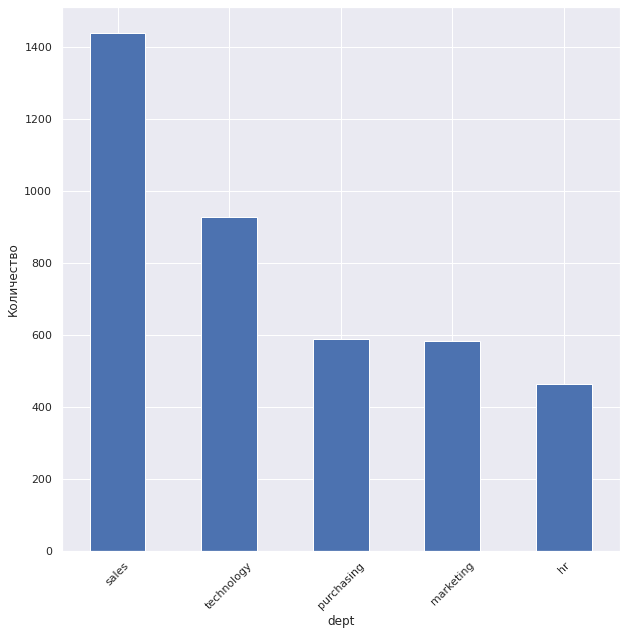

In [85]:
research_object_data(train_quit_data, 'dept')

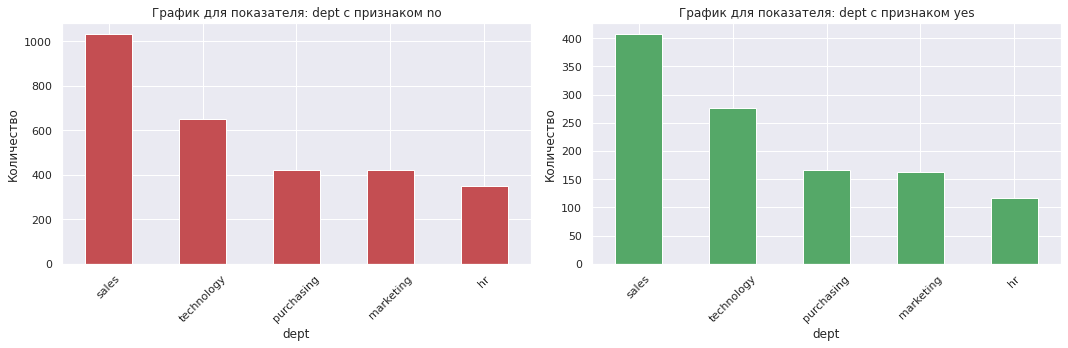

In [86]:
research_object_data_with_target(train_quit_data, 'dept', 'quit')

Уникальные значения:


junior    1949
middle    1694
sinior     357
Name: level, dtype: int64


Линейчатый график для показателя: level


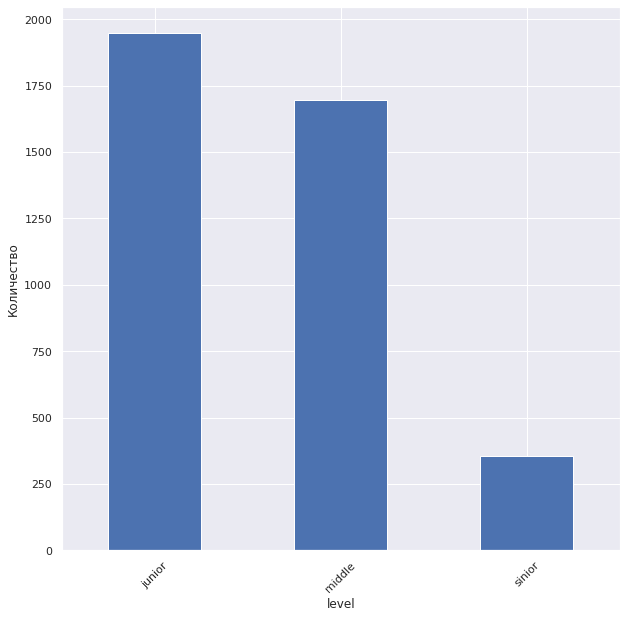

In [87]:
research_object_data(train_quit_data, 'level')

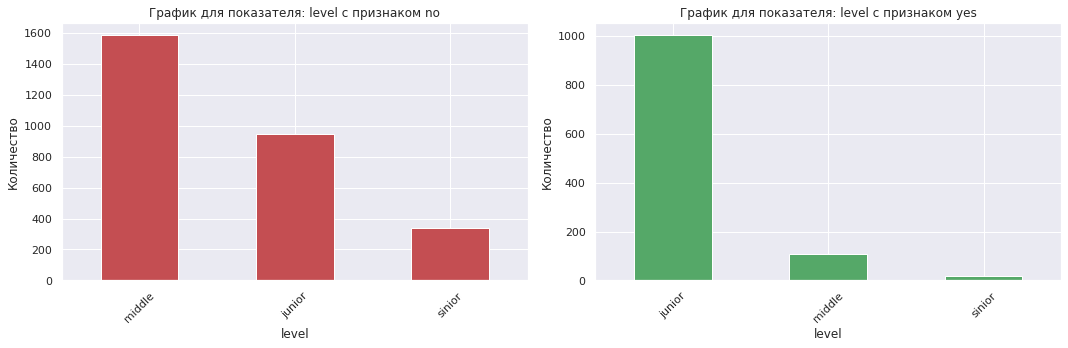

In [88]:
research_object_data_with_target(train_quit_data, 'level', 'quit')

Уникальные значения:


medium    2118
low       1208
high       674
Name: workload, dtype: int64


Линейчатый график для показателя: workload


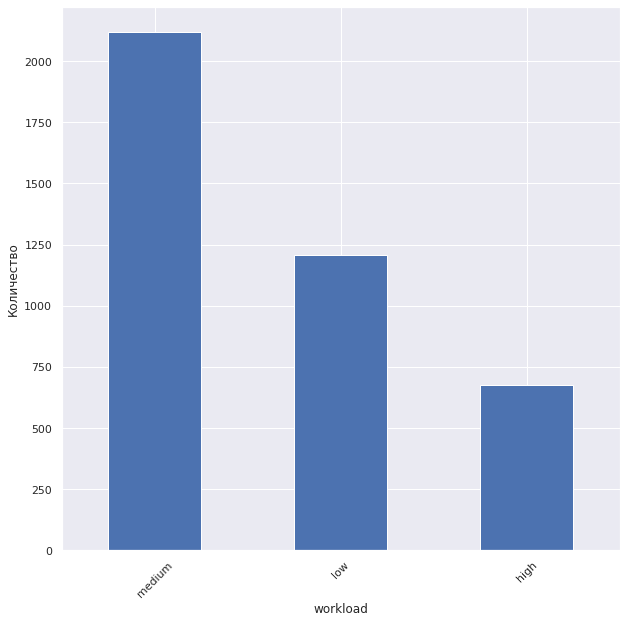

In [89]:
research_object_data(train_quit_data, 'workload')

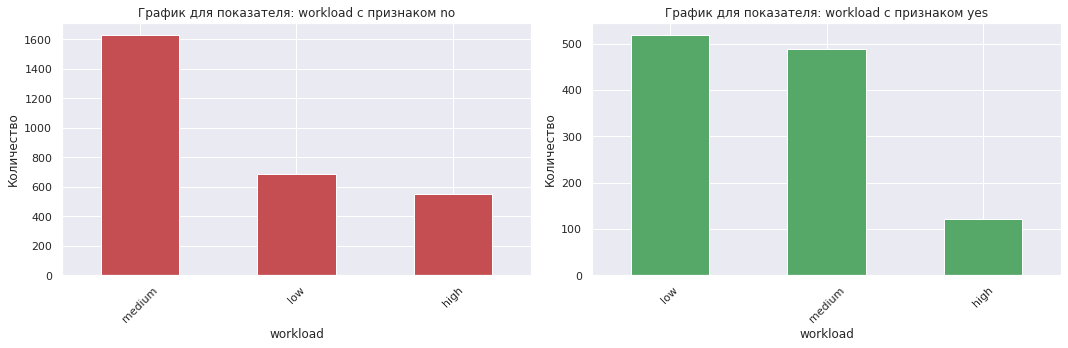

In [90]:
research_object_data_with_target(train_quit_data, 'workload', 'quit')

Уникальные значения:


no     3887
yes     113
Name: last_year_promo, dtype: int64


Линейчатый график для показателя: last_year_promo


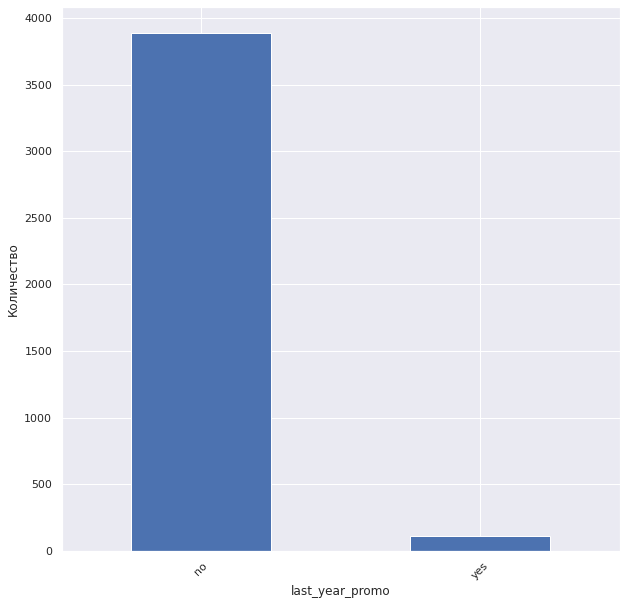

In [91]:
research_object_data(train_quit_data, 'last_year_promo')

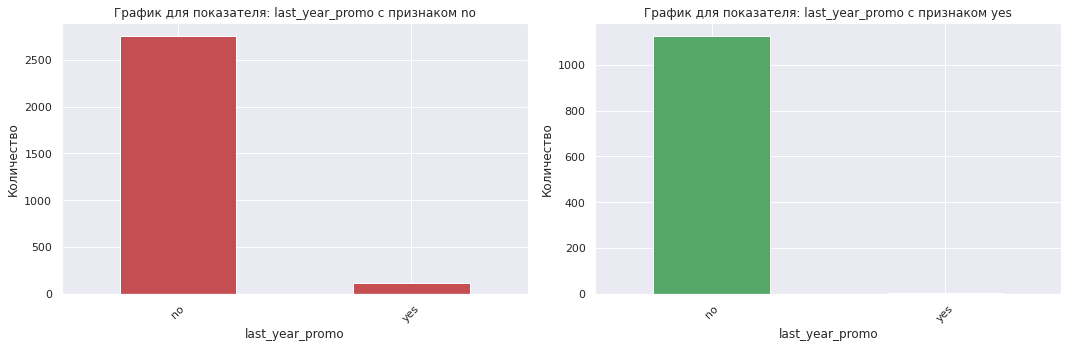

In [92]:
research_object_data_with_target(train_quit_data, 'last_year_promo', 'quit')

Уникальные значения:


no     3455
yes     545
Name: last_year_violations, dtype: int64


Линейчатый график для показателя: last_year_violations


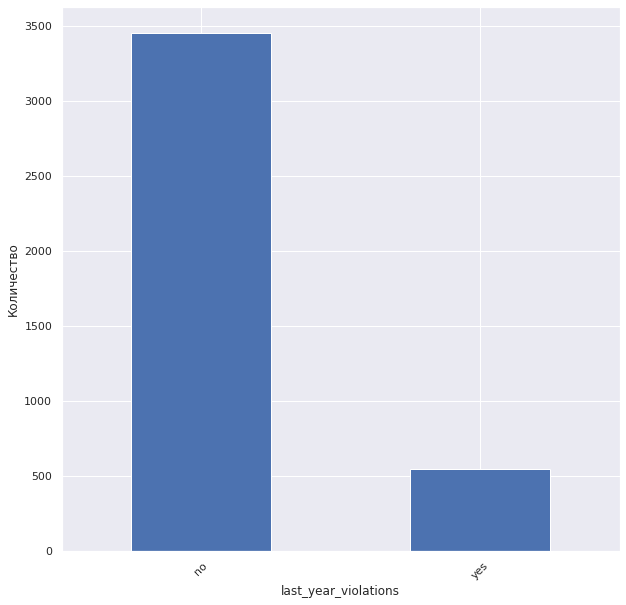

In [93]:
research_object_data(train_quit_data, 'last_year_violations')

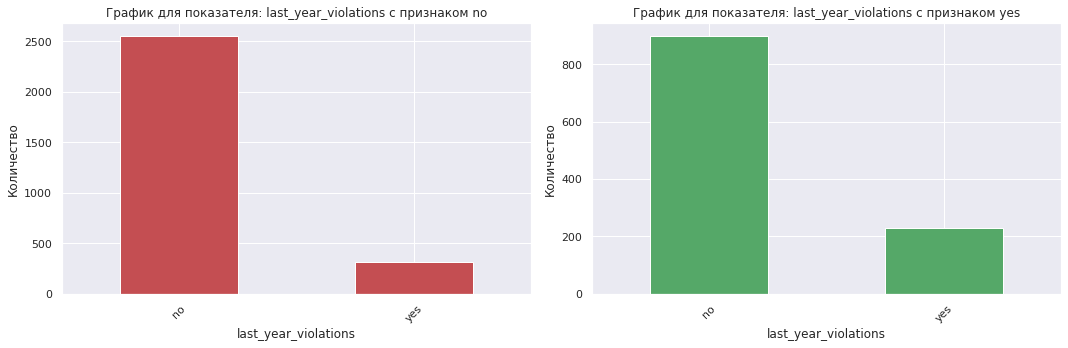

In [94]:
research_object_data_with_target(train_quit_data, 'last_year_violations', 'quit')

Уникальные значения:


no     2872
yes    1128
Name: quit, dtype: int64


Линейчатый график для показателя: quit


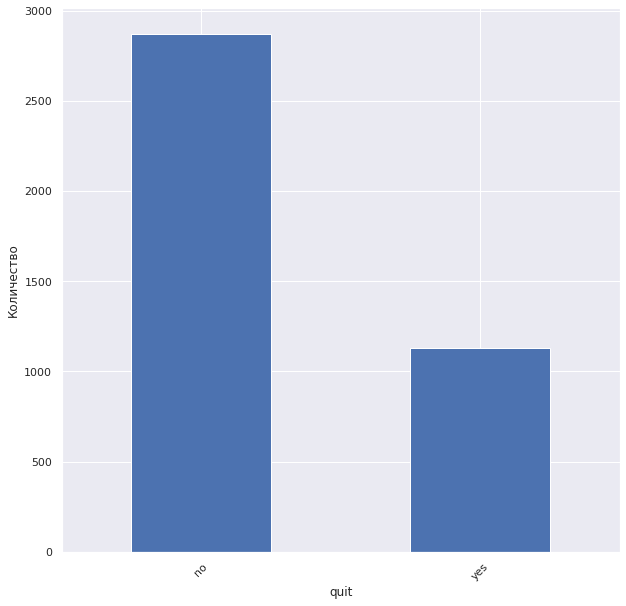

In [95]:
research_object_data(train_quit_data, 'quit')

Описание данных:


count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


Уникальные значения(10 наиболее частых):


1     985
2     777
3     479
4     393
5     362
7     308
6     296
8     174
9     136
10     90
Name: employment_years, dtype: int64

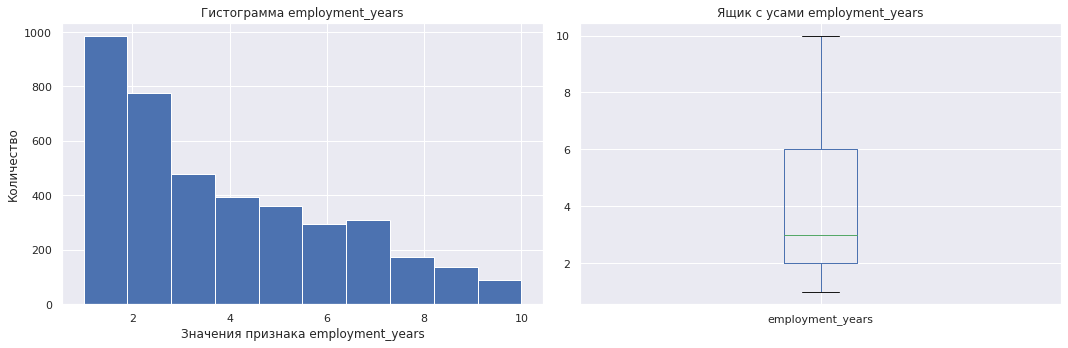

In [96]:
research_numeric_data(train_quit_data, 'employment_years')

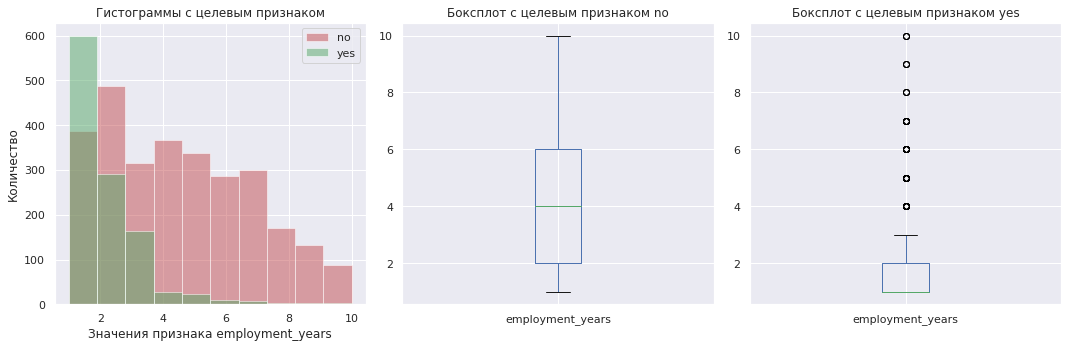

In [97]:
research_numeric_data_with_target(train_quit_data, 'employment_years', 'quit')

Описание данных:


count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


Уникальные значения(10 наиболее частых):


4    1654
3    1233
5     520
2     391
1     202
Name: supervisor_evaluation, dtype: int64

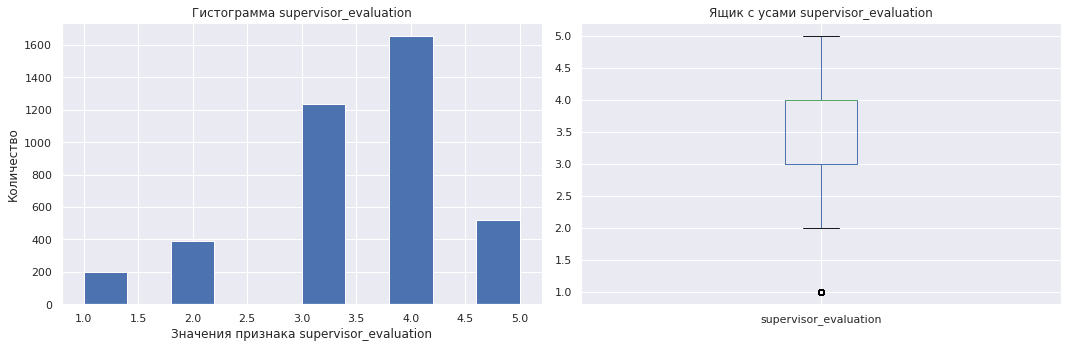

In [98]:
research_numeric_data(train_quit_data, 'supervisor_evaluation')

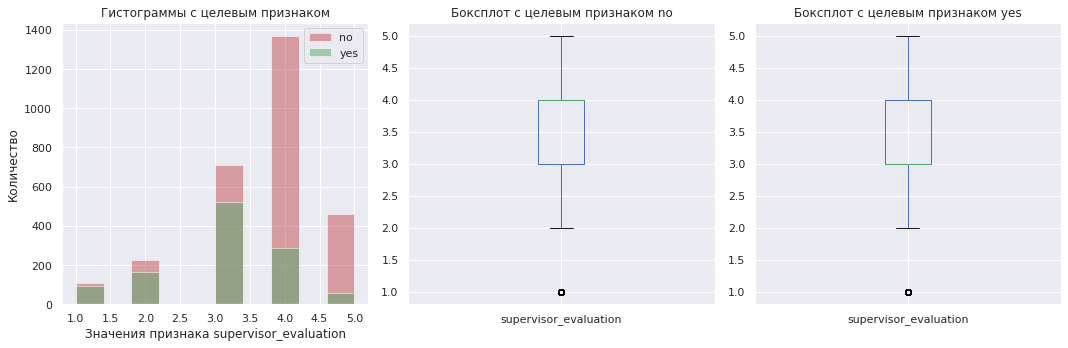

In [99]:
research_numeric_data_with_target(train_quit_data, 'supervisor_evaluation', 'quit')

Описание данных:


count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


Уникальные значения(10 наиболее частых):


24000    200
27600    185
19200    182
26400    180
33600    164
21600    163
22800    156
25200    156
28800    136
30000    134
Name: salary, dtype: int64

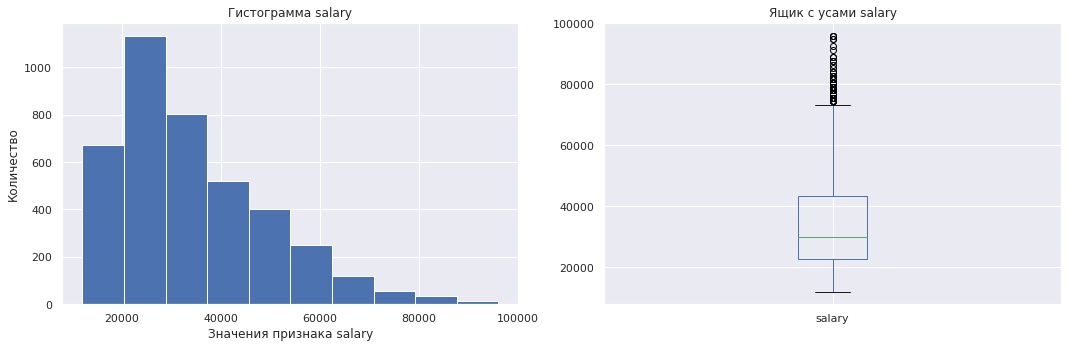

In [100]:
research_numeric_data(train_quit_data, 'salary')

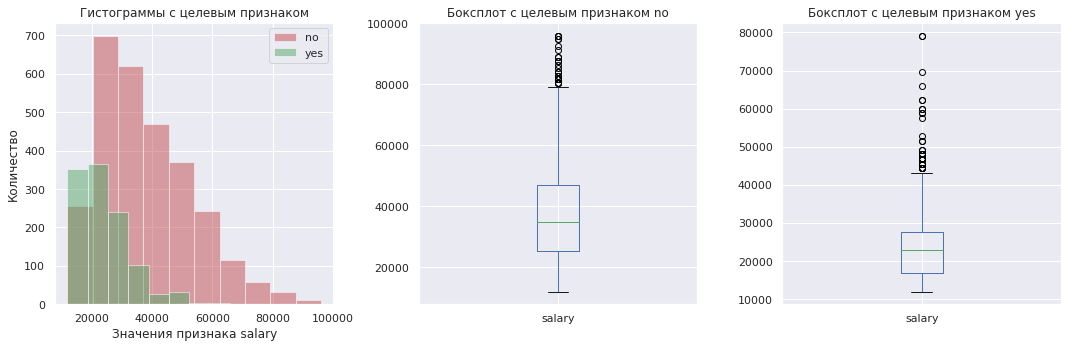

In [101]:
research_numeric_data_with_target(train_quit_data, 'salary', 'quit')

Выбросов или каких-то странных значений не наблюдается. В предыдущем проекте ревьювер подсказал этот момент с анализом остальных признаков относительно целевого и это очень хорошо визуализирует разные зависимости, что позволяет уже делать достаточно интересные выводы и предположения. Фактически, в этом исследовательском анализе уже есть ответы на дополнительные вопросы проекта, типа портрета уволившегося или проверки утверждения. Поэтому я тут не стану писать про это, чтобы избежать тавтологии.

<a id="38"></a>
#### [Данные `test_features.csv`](#25.1)

In [102]:
test_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Уникальные значения:


sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64


Линейчатый график для показателя: dept


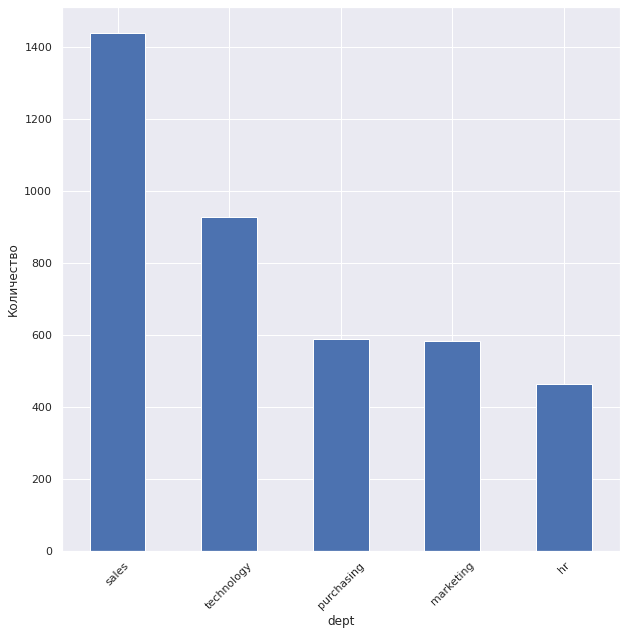

In [103]:
research_object_data(train_quit_data, 'dept')

Уникальные значения:


junior    1949
middle    1694
sinior     357
Name: level, dtype: int64


Линейчатый график для показателя: level


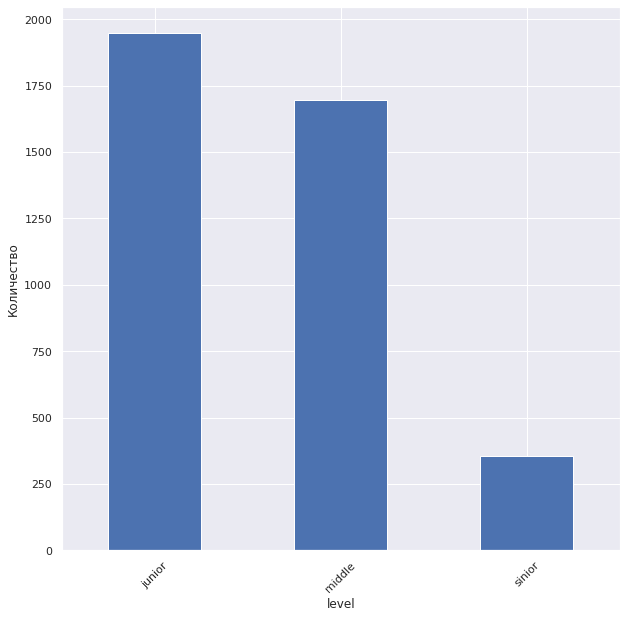

In [104]:
research_object_data(train_quit_data, 'level')

Уникальные значения:


medium    2118
low       1208
high       674
Name: workload, dtype: int64


Линейчатый график для показателя: workload


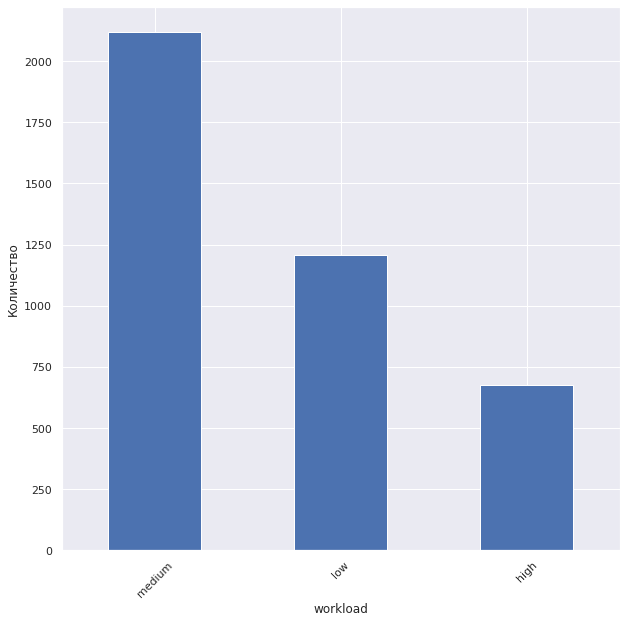

In [105]:
research_object_data(train_quit_data, 'workload')

Уникальные значения:


no     3887
yes     113
Name: last_year_promo, dtype: int64


Линейчатый график для показателя: last_year_promo


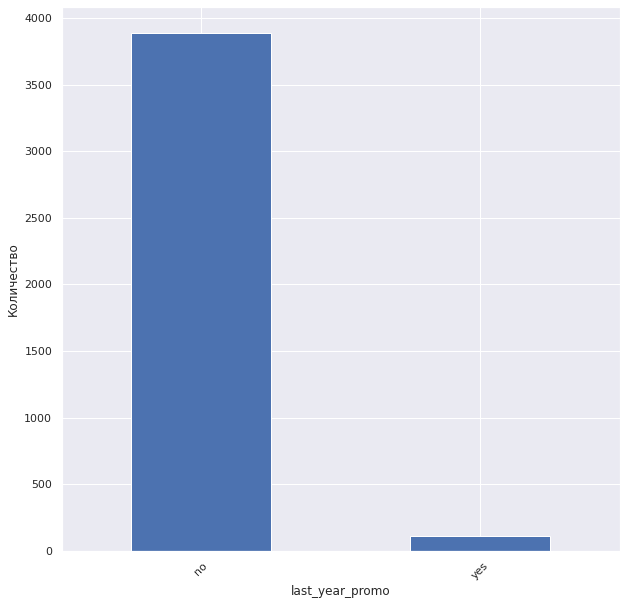

In [106]:
research_object_data(train_quit_data, 'last_year_promo')

Уникальные значения:


no     3455
yes     545
Name: last_year_violations, dtype: int64


Линейчатый график для показателя: last_year_violations


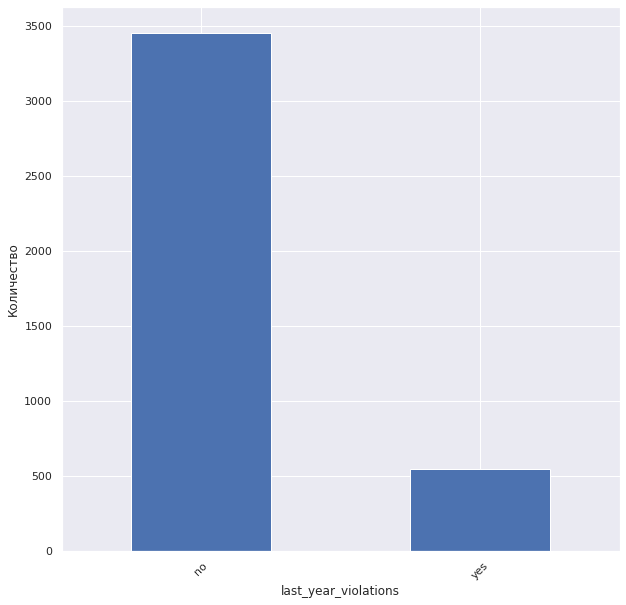

In [107]:
research_object_data(train_quit_data, 'last_year_violations')

Описание данных:


count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


Уникальные значения(10 наиболее частых):


1     985
2     777
3     479
4     393
5     362
7     308
6     296
8     174
9     136
10     90
Name: employment_years, dtype: int64

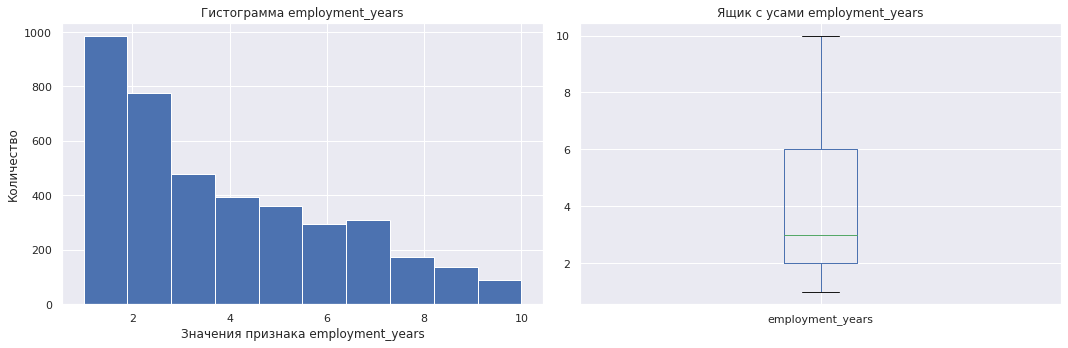

In [108]:
research_numeric_data(train_quit_data, 'employment_years')

Описание данных:


count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


Уникальные значения(10 наиболее частых):


4    1654
3    1233
5     520
2     391
1     202
Name: supervisor_evaluation, dtype: int64

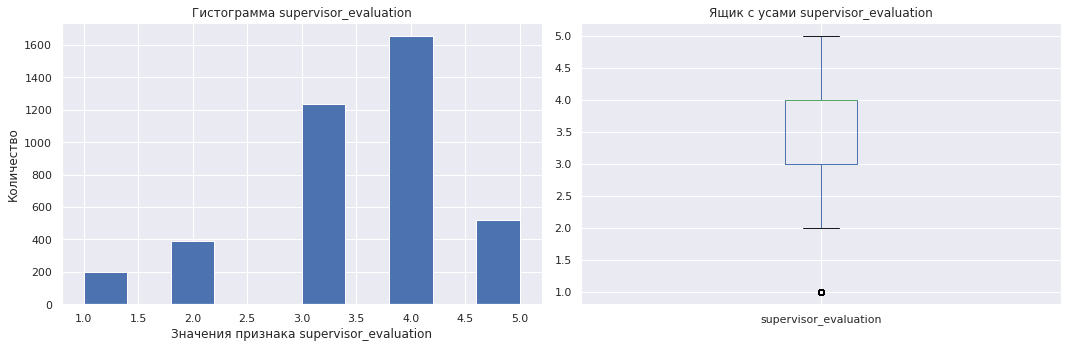

In [109]:
research_numeric_data(train_quit_data, 'supervisor_evaluation')

Описание данных:


count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


Уникальные значения(10 наиболее частых):


24000    200
27600    185
19200    182
26400    180
33600    164
21600    163
22800    156
25200    156
28800    136
30000    134
Name: salary, dtype: int64

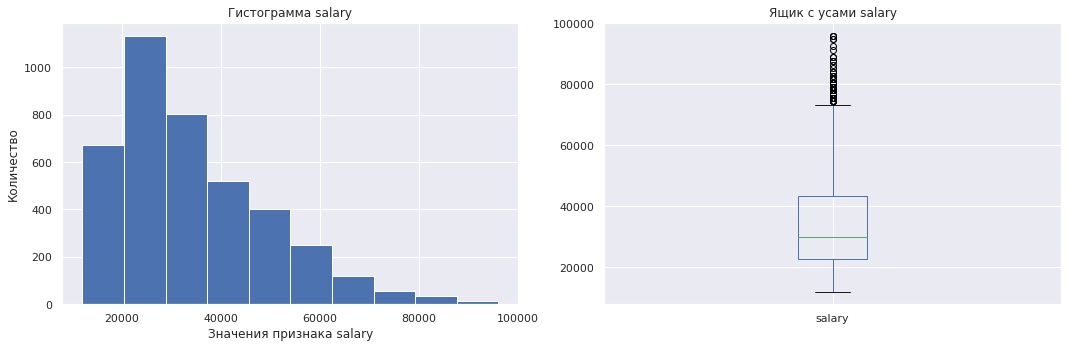

In [110]:
research_numeric_data(train_quit_data, 'salary')

Аномалий не видно. Данные распределены вполне равномерно.

<a id="39"></a>
#### [Данные `test_target_quit.csv`](#25.1)

Уникальные значения:


no     2872
yes    1128
Name: quit, dtype: int64


Линейчатый график для показателя: quit


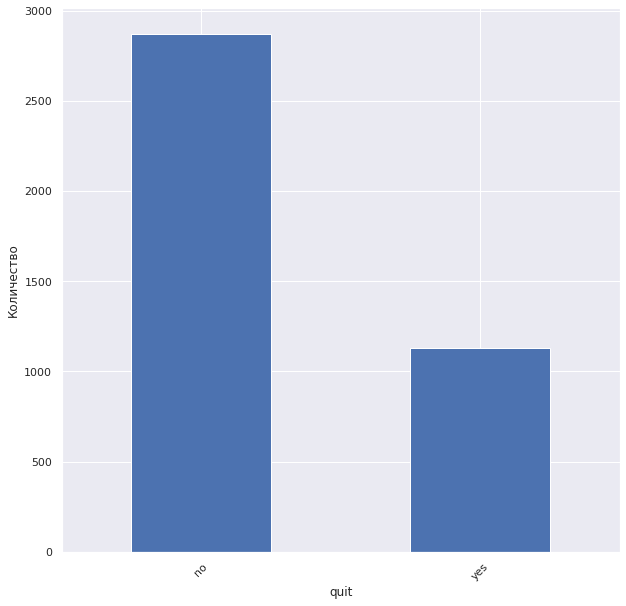

In [111]:
research_object_data(train_quit_data, 'quit')

Все три датафрейма проанализированы и в целом аналогичны фреймам из предыдущего этапа.

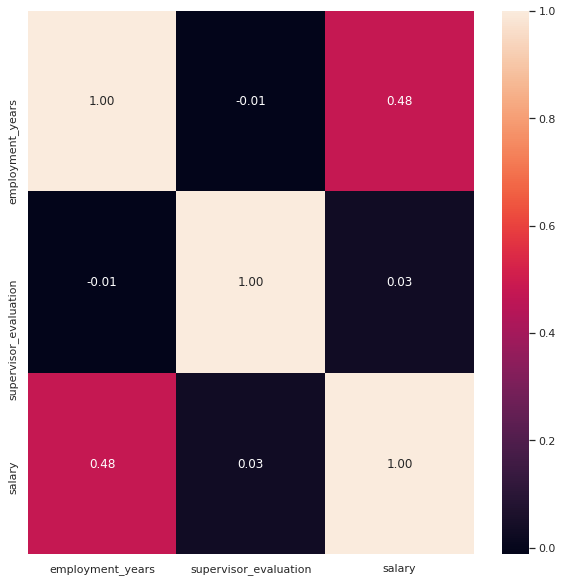

In [112]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(train_quit_data.drop(['id'], axis=1).corr(method='spearman'), annot=True, fmt='.2f');

<a id="46"></a>
#### [Портрет «уволившегося сотрудника»](#25.1)

В качестве фрейма для анализа возьмём фрейм с тренировочными данными. 

In [113]:
train_quit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [114]:
train_quit_data.query("quit == 'yes'").describe()

,id,employment_years,supervisor_evaluation,salary
count,1128.000000,1128.000000,1128.000000,1128.000000
mean,544544.457447,1.844858,3.046099,23885.106383
std,258059.498361,1.274920,0.973291,9351.599505
min,100222.000000,1.000000,1.000000,12000.000000
25%,325073.000000,1.000000,3.000000,16800.000000
50%,545003.500000,1.000000,3.000000,22800.000000
75%,756296.000000,2.000000,4.000000,27600.000000
max,999158.000000,10.000000,5.000000,79200.000000


Для начала можем проанализировать численные признаки. Человек увольняется в большинстве своем после одного года работы в компании. Вероятно, сотрудника не устраивает что-то в работе. В среднем руководитель оценивает работу сотрудников на 3 из 5. Можно предположить, что это нормально, не плохо, но и не идеально. Сотрудник выполняет свою работу. Средняя заработная плата составляет 23 тыс. при этом, есть персонал с зарплатой и около 80 тыс. В среднем сотрудники получали от 15 тыс. до 30 тыс. Пока обычная средняя компания.

In [115]:
train_quit_data.query("quit == 'yes'")['dept'].value_counts(normalize=True).reset_index()

,index,dept
0,sales,0.360816
1,technology,0.244681
2,purchasing,0.147163
3,marketing,0.144504
4,hr,0.102837


Больше всего сотрудников работало в отделе продаж, практически 1/3. Затем в отделе технологий порядка 1/5. 

In [116]:
train_quit_data.query("quit == 'yes'")['level'].value_counts(normalize=True).reset_index()

,index,level
0,junior,0.889184
1,middle,0.095745
2,sinior,0.015071


В большинстве своём ушедшие сотрудники являлись джунами. Скорее всего отработали год, набались опыта и ушли в другие компании по тем или иным причинам. Получается в компании есть проблема с удержанием молодых специалистов.

In [117]:
train_quit_data.query("quit == 'yes'")['workload'].value_counts(normalize=True).reset_index()

,index,workload
0,low,0.460106
1,medium,0.432624
2,high,0.107270


При это уровень загруженности сотрудника был не высок и вполне в нормальном режиме так, чтобы сотрудник мог выполнять свои обязанности, повышать квалификацию в процессе решения возникающих проблем/вопроссов. Примерно столько же сотрудников были загружены средне.

In [118]:
train_quit_data.query("quit == 'yes'")['last_year_promo'].value_counts(normalize=True).reset_index()

,index,last_year_promo
0,no,0.999113
1,yes,0.000887


Практически ни у кого за время работы не было повышения. Теперь и понятна причина ухода. Вероятно компания не заинтересована в росте сотрудника, а закрывает мелкие задачи новичками. Тоже вполне хорошая практика на множетсве простых задач сотрудники получают опыт и идут далее развиваться в прочие компании. Возможно при этом в компании хорошая база по обучению и сопровождению молодых специалистов.

In [119]:
train_quit_data.query("quit == 'yes'")['last_year_violations'].value_counts(normalize=True).reset_index()

,index,last_year_violations
0,no,0.797872
1,yes,0.202128


Условия трудового договора нарушал каждый пятый сотрудник. Интересно чем это было вызвано, возможно опозданиями? Если предположить, что начинающий специалист задерживался на работе и что-то доучивал дома, то в итоге просыпал. Помимо прочих серьезных нарушений на рабочем месте.

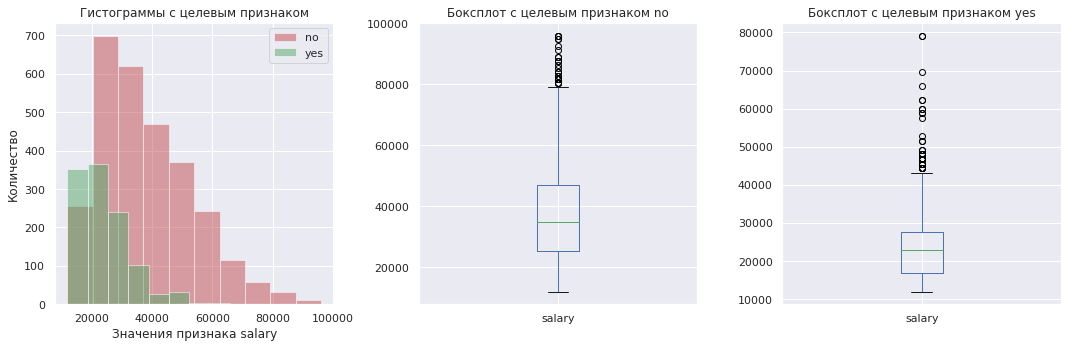

In [120]:
research_numeric_data_with_target(train_quit_data, 'salary', 'quit')

При анализе зарпалты в разрезе целевого признака не сказать, что в среднем зарплата уволившегося сотрудника и работающего значительно отличались. Конечно разница есть, но она не в два раза и более.

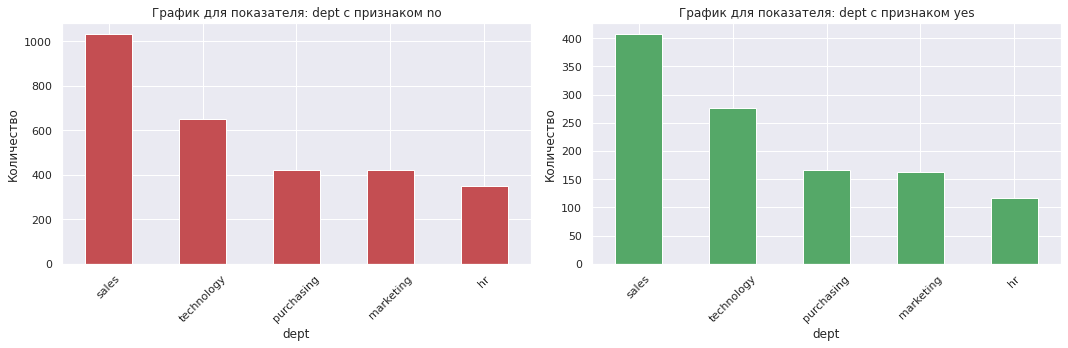

In [121]:
research_object_data_with_target(train_quit_data, 'dept', 'quit')

Сотрудники покидали компанию равномерно из казждых отделов, без явного фаворита.

**Вывод:** из компании уходят молодые специалисты не дождавшись повышения. Скорее всего уровень зарплаты и объем работы менее влияют на уход из компании.

<a id="47"></a>
#### [Проверка утверждения аналитиков](#25.1)

Для начала нам нужно сопоставить данные предсказаний с `id` пользователей. Создадим ноый датафрейм, добавим в него `id` из исходного, потом к ним добавим предсказания. Если я правильно понимаю логику построение предсказний и разделениях данных, то мы получим коректное предсказание для каждого `id`.

In [122]:
data_predict_ch1 = pd.DataFrame()
data_predict_ch1['id'] = test_data_ch1['id']
data_predict_ch1['job_satisfaction_rate'] = y_test_pred
data_predict_ch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 46.9 KB


Теперь необходимо объединить три фрейма с тестовыми признакми и предсказанный признак из первой задачи(по условию, если я его верно понял).

In [123]:
analitic_hypothesis = pd.merge(
    test_features_data,
    test_target_quit_data,
    how='left',
    on='id'
)

analitic_hypothesis = pd.merge(
    analitic_hypothesis,
    data_predict_ch1,
    how='left',
    on='id'
)
analitic_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1997 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               1999 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   quit                   2000 non-null   object 
 10  job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 187.5+ KB


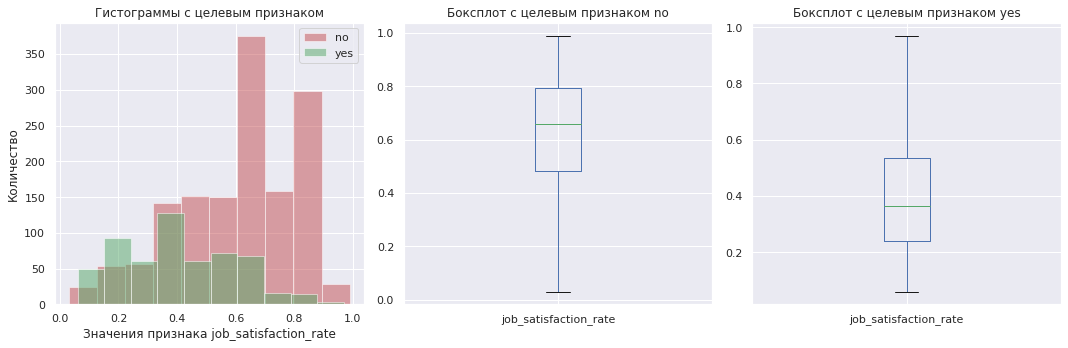

In [124]:
research_numeric_data_with_target(analitic_hypothesis, 'job_satisfaction_rate', 'quit')

**Вывод:** как показывают данные уровень удовлетворенности сотрудников дейтсвительно может влиять на то уходит сотрудник из компнаии или нет. Гипотеза имеет место быть. Можно сделать вывод, что если удовлетворенность работой находится на уровне 0.4 и ниже, то есть достаточное основание полагать, что сотрудник может в скором времени уйти. Так же есть исключения, сотрудник и с оценкой ниже 0.4 может продолжать как работать, так и пока работать. 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Хорошо. Добавлю, что сравнение распределений признака job_satisfaction_rate для ушедших и оставшихся работников можно провести с использованием стат теста

<div class="alert alert-info">

<h2> Комментарий студента: <a class="tocSkip"> </h2>
    
Спасибо, принято.

In [129]:
working = analitic_hypothesis[analitic_hypothesis['quit'] == 'no']['job_satisfaction_rate'].to_list()
is_gone = analitic_hypothesis[analitic_hypothesis['quit'] == 'yes']['job_satisfaction_rate'].to_list()

alpha = 0.05 # уровень статистической значимости

results = st.ttest_rel(working[:len(is_gone)], is_gone)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средней удовлетворенности')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве средней удовлетворенности')

p-значение: 4.536958978748614e-52
Отвергаем нулевую гипотезу о равенстве средней удовлетворенности


In [131]:
working = analitic_hypothesis[analitic_hypothesis['quit'] == 'no']['job_satisfaction_rate']
is_gone = analitic_hypothesis[analitic_hypothesis['quit'] == 'yes']['job_satisfaction_rate']

In [132]:
working.mean()

0.6102956623042021

In [133]:
is_gone.mean()

0.40337645108024583

Если я правильно понял и истолковал "стат тест". В целом это так же понятно по боксплотам.

<a id="40"></a>
### [Добавление нового входного признака](#25.1)

Добавим новый входной признак, как от нас требует задание.

In [134]:
train_quit_job = train_quit_data.drop(['quit'], axis=1)
adding_signs(train_quit_job)

train_quit_job['job_satisfaction_rate'] = rs.best_estimator_.predict(train_quit_job)

train_quit_job = train_quit_job.drop(
    [
        'salary_2', 'salary_3', 'employment_years_2', 'employment_years_365', 'supervisor_evaluation_2',
        'supervisor_evaluation_0_5', 'employment_years_category'
    ], axis=1)

# test_features_data
test_features_quit_job = pd.merge(
    test_features_data,
    data_predict_ch1,
    how='left',
    on='id'
)



In [135]:
train_quit_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [136]:
#adding_signs(test_features_quit_job)
test_features_quit_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1997 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               1999 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB


Поскольку в обучающей выборке `id` отсутсвуют во всех остальных фреймах, то предсказываем уровень удовлетворенности.

<a id="41"></a>
### [Подготовка данных](#25.1)

Подготавливаем данные и идём, как и ранее по одному пайплайну. 

In [137]:
X_train_ch2 = train_quit_job.drop(['id'], axis=1)
#y_train_ch2 = train_quit_data['quit'].apply(lambda x: 0 if x == 'yes' else 1)

In [138]:
label_encoder = LabelEncoder()

y_train_ch2 = label_encoder.fit_transform(train_quit_data['quit'])

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Кодирование таргетов не следует делать руками.

- при появлении новых значений категориальных признаков, не предусмотренных нашим кодом, модель или упадёт, или будет генерировать ошибки;
- такое решение не сделать частью пайплайна, а все современные решения базируются на них.
    
Для кодирования целевого признака нужно использовать LabelEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.

    
    le = LabelEncoder()
    le.fit_transform(X_train['quit'])
    le.transform(X_test['quit'])
    



<div class="alert alert-info">

<h2> Комментарий студента: <a class="tocSkip"> </h2>
    
Принято, добавил кодирование. 

ohe_columns = ['dept']
ord_columns = ['level', 'workload', 'last_year_promo', 'last_year_violations', 'employment_years_category']
num_columns = train_quit_job.drop(
    ['id'],
    axis=1
).select_dtypes(exclude=['object']).columns.to_list()

ohe_columns = ['dept']
ord_columns = ['level', 'workload', 'last_year_promo', 'last_year_violations']
num_columns = train_quit_job.drop(
    ['id'],
    axis=1
).select_dtypes(exclude=['object']).columns.to_list()

In [139]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload',]
num_columns = train_quit_job.drop(
    ['id'],
    axis=1
).select_dtypes(exclude=['object']).columns.to_list()

In [140]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))  # , sparse=False
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[ 
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'low', 'high'],
                    ['yes', 'no'],
                    ['yes', 'no'],
                    ['более 3', 'менее 3'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[ 
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'low', 'high'],
                    ['yes', 'no'],
                    ['yes', 'no'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [141]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[ 
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'low', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [142]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [143]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [144]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__max_features': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__metric': ["minkowski", "manhattan", "euclidean"],
        'models__n_neighbors': range(5, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            probability=True,
       )],
        'models__C': [0.1, 1, 5, 10],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

<a id="42"></a>
### [Обучение моделей](#25.1)

<a id="43"></a>
#### [Метрика ROC_AUC](#25.1)

ROC-кривая учитывает не только результаты классификации, но и вероятность предсказания всех классов.Поэтому она отлично подходит для данной задачи в качестве оценочной характеристики.

<a id="44"></a>
#### [Модели](#25.1)

In [148]:
%%time
rs_ch2 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    scoring='roc_auc', 
    cv=5,
    n_jobs=-1
)
rs_ch2.fit(X_train_ch2, y_train_ch2)
print('Лучшая модель и её параметры:\n\n', rs_ch2.best_estimator_)
print('Метрика roc_auc для лучшей модели:\n', rs_ch2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
                                 

Теперь так же предскажем это на тестовых данных.

In [157]:
y_test_ch2 = label_encoder.transform(test_target_quit_data.sort_values(by='id')['quit'])

probabilities = rs_ch2.predict_proba(test_features_quit_job.sort_values(by='id'))[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_ch2, probabilities)}')

Метрика ROC-AUC на тестовой выборке: 0.9191644935696083


~~Тут нужна помощь, не понимаю, почему метрика так занижается на тестовых данных. Вроде бы это называлось переобучением, когда модель слишком зацикливается на подгоне показателя на тренировочных данных. Убирать признаки нет смысла они все важны для предсказания ухода. Я пробовал как убирать дополнительные из прошлой модели, так и иоставялть их - тот же результат.~~    
    
Метрика `ROC_AUC` отвечает требованиям заказчика, а значит модель делает предсказания ухода сотрудника с необходимой точностью.

<div class="alert alert-info">

<h2> Комментарий студента: <a class="tocSkip"> </h2>
    
Поправил кодирование целевого признака. ...ахаха, нет, кодирование признака было не при чем. Нет, его определенно нужно было делать, это моё упущение и полностью с этим согласен. Порядок айдишников. Это очень тупо, н опри этом очень спасибо! То есть если `id` идут в разных порядках, то это критична. Модельки сравнивают данные по строкам прчием строго из-за чего нужна сортировка. Это логично, ведь для строк мы получаем те или иные предсказания в зависимости от содержания. Забавно, я ранее не задумывался, что модельки настолько чувствительны, хотя частично такое встречал в прошлых проектах. Просто ранее как-то `id` не был прям центром вселенной и мне казалось, что можно подавать данные как угодно, но получается - нет. Сейчас у нас есть такой критерий для выделения данных в одну последовательность, если его не будет, то нужно будет выдумать. Жесть, но интересно.

<a id="45"></a>
### [Общий вывод задачи](#25.1)

**Вывод:** Была построена модель, которая позволяет предсказывать уйдет сотрудник из компании или нет.   
   
Помимо этого мы составили портрел уволивщегося сотрудника: из компании уходят молодые специалисты не дождавшись повышения. Скорее всего уровень зарплаты и объем работы менее влияют на уход из компании.   
    
Проверили утверждение аналитиков: как показывают данные уровень удовлетворенности сотрудников дейтсвительно может влиять на то уходит сотрудник из компнаии или нет. Гипотеза имеет место быть. Можно сделать вывод, что если удовлетворенность работой находится на уровне 0.4 и ниже, то есть достаточное основание полагать, что сотрудник может в скором времени уйти. Так же есть исключения, сотрудник и с оценкой ниже 0.4 может продолжать как работать, так и пока работать.

<a id="48"></a>
## Общие выводы

У вас было несколько задач. 
* Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;   

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.    

* Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компани


Подход к решению поставленных задач сводился к следующему: сначала был проведен первичный анализ данных в файлах, какие есть показатели, сколько элементов, к какому типу относятся. Затем были построены гистрограммы и ящики с усами, чтобы лучше уловить зависимости и разного рода "проблемы данных". После чего выполнялась предобработка данных, на этапе которой были обнаружены пропуски, проверены дубликаты и сделаны выводы по аномалиям, если таковые имелись. Затем шел этап исследовательского анализа, где мы лучше погружались в исследование распределения признаков в зависимост от целевого. После чего строили пайплайны для корректировки, кодирования данных и использовали его в выборе лучшей модели для предсказаний целевых признаков.   
    
А вот на счет выводов и предложений для бизнеса... мне пока сложно это адекватно сформулировать. Я не понимаю цели компании. Если бы был вопрос кто от компании чаще уходит, то есть была бы конкретика, то можно было делать упор на желаемое и предоставить ответ. То есть от компании уходят джуны, потому что их не повышают. Казалось бы вывод для бизнеса - нет! Это лжевывод. А у компании есть цель, чтобы джуны оставались или наоборот они просто позволяют им набраться опыта и целью является наводнение рынка более квалифицированными кадрами при том, что в компании и так хорошие и сильные специалисты. Или наоборот по такому случаю компания хочет, чтобы джуны не год задерживались, а уходили еще быстрее?! Или компания заинтересована в удержалии мидлов/сеньоров? При этом я могу сделать общие выводы, но они ничем не помогут. К примеру: сотрудники из компании уходят зачастую из-за отсутсвия роста и низкой зарплаты. Только кто-то получает 96 тыс, а кто-то 12 тыс. В этом выводе речь про кого? Компании нужно повысить зарплату джунам, чтобы их дольше удержать или сеньорам, но у них не такая и текучка кадров. Можно в общем сказать, что нагрузка для всех примерно равномерна. Но это тоже лжевывод, в цифрах да, а фактически нет. Более опытные специалисты решают более сложные задачи. Опираясь на графики можно сказать, что сотрудники со средней нагрузкой менее довольны работой, в отличие от тех у кого она ниже. В качестве доп.задачи можно было бы сравнить нагрузки разных уровней специалистов и касательно интересуещего нас уровня уже делать выводы.

<div class="alert alert-success">   
    
#### 📖 **Полезные ссылки**

* [Открытый курс машинного обучения](https://habr.com/ru/company/ods/blog/322626/)
* [Книжка от ШАД](https://academy.yandex.ru/handbook/ml/)
* [лекции от Andrew Ng:](https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN)
* [FeatureSelector поможет отобрать важные признаки и избавит от ручной обработки](https://proglib.io/p/feature-selector)
* [FeatureSelector более сложная статься на Kaggle](https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook)
* [Кодирование целевого признака нужно использовать `LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)


  
</div>